<div class="alert alert-info">
<h1><center><font color=darkblack> CORONARY HEART DISEASE PREDICTION USING LOGISTIC REGRESSION.<font></center></h1>


</div>

# PROBLEM STATEMENT

A healthcare organization together with a couple of government hospitals in a city has collectedinformation about the vitals that would reveal if the person might have a coronary heart disease inthe next ten years or not. This study is useful in early identification of disease and have medicalintervention if necessary. This would help not only in improving the health conditions but also theeconomy as it has been identified that health performance and economic performance areinterlinked. This research intends to develop appropriate models to identify/predict if the personlikely to have heart disease or not

IT IS  A BINARY CLASSIFICATION TYPE OF PROBLEM

 So it can be solve by using logistic regression Technique

# Import libraries 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

# DATA UNDERSTANDING
Quick glance of data The total number of records is 34281 with 24 independent attributes and the 25th column is the target which needs to be predicted. The variables are masked, and we get little information from their names. Missing values are represented as NA in some columns and as -99 in some other columns

In [2]:
import warnings

warnings.filterwarnings('ignore')

# Variables :

Out of 25 attributes 24 attributes are independent variables. In this data sets all are masked variables and Target Column is our predict variable 
    
    
Predict variable (desired target):
    Target

# Import datasets

In [3]:
heart_df=pd.read_csv("C:/Users/lokesh Rachuri/Downloads/New folder/Problem1_train.csv")
heart_df_test=pd.read_csv("C:/Users/lokesh Rachuri/Downloads/New folder/Problem1_test.csv")

# Visuvalizations  

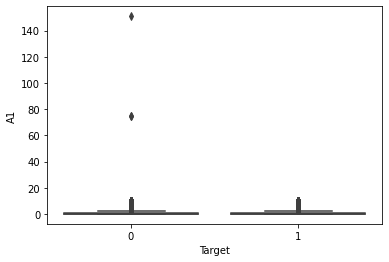

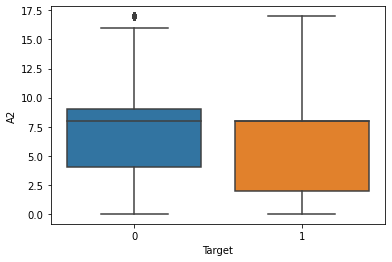

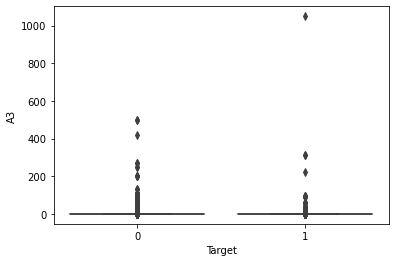

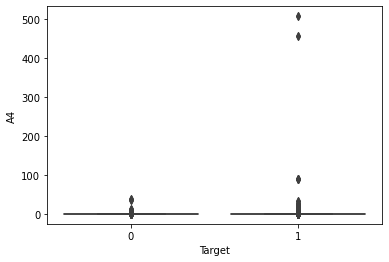

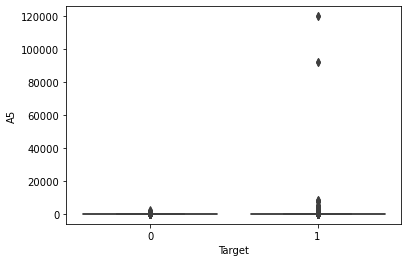

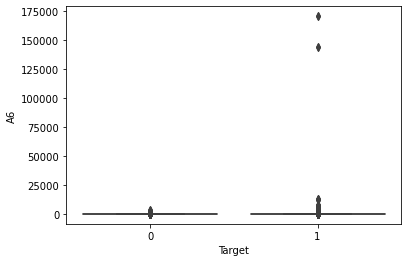

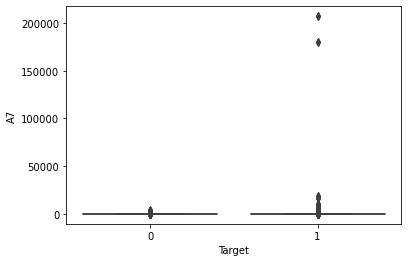

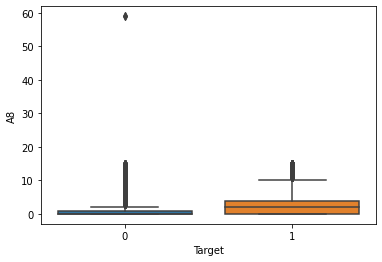

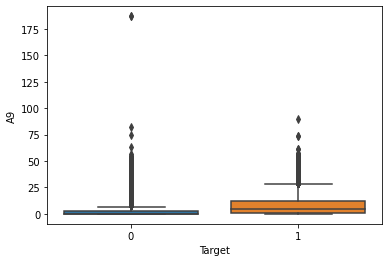

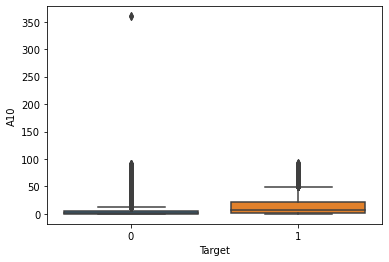

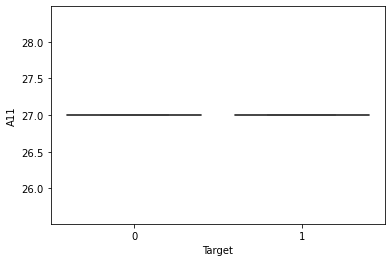

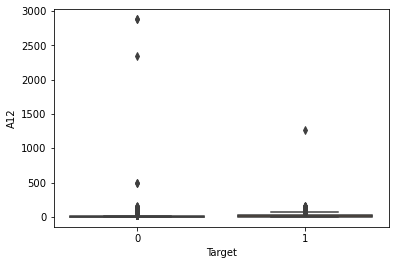

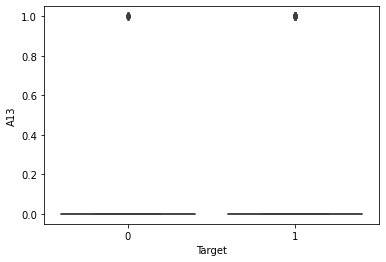

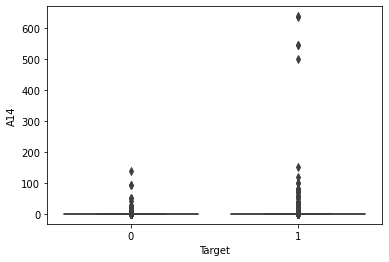

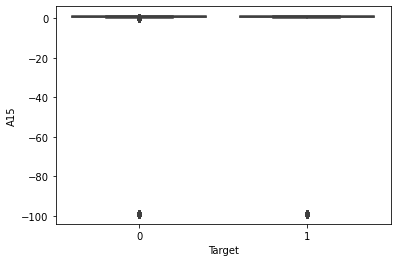

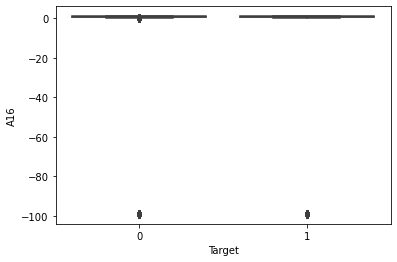

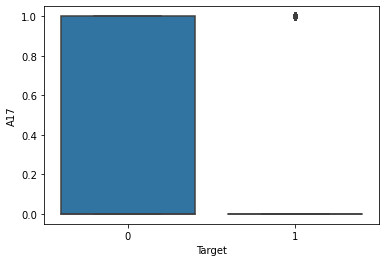

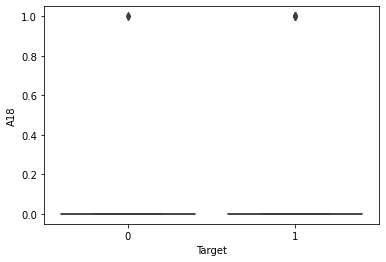

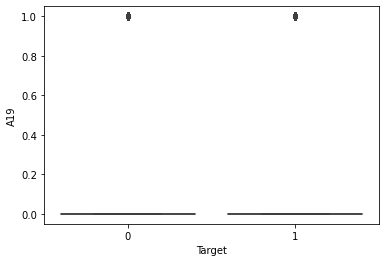

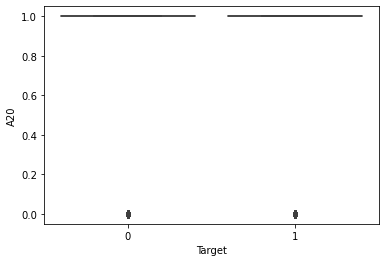

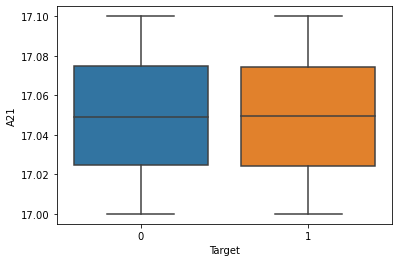

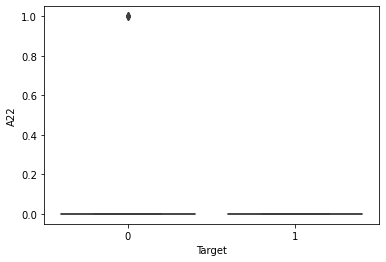

In [4]:
for var in [ 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18',
       'A19', 'A20', 'A21', 'A22']:
    sn.boxplot(x='Target',y=var,data=heart_df)
    plt.show()

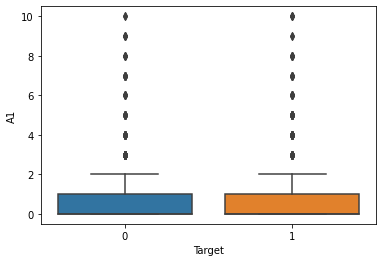

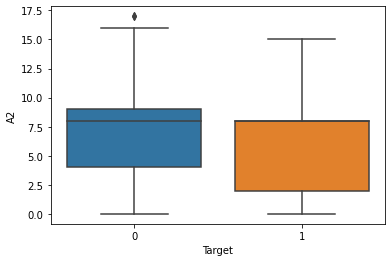

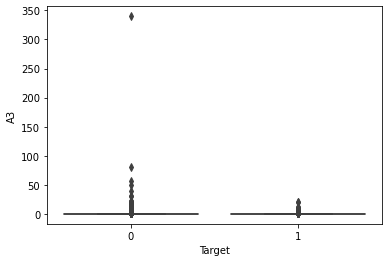

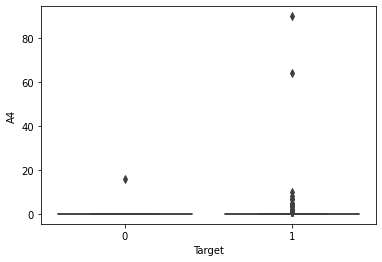

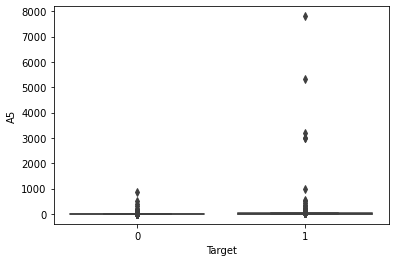

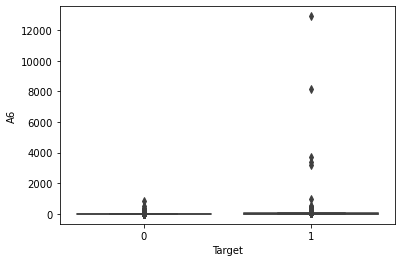

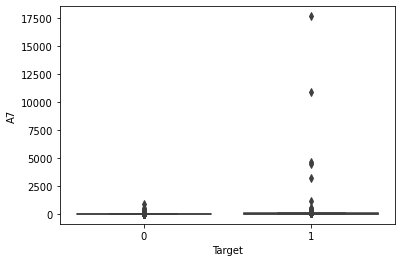

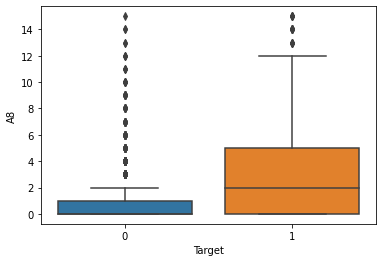

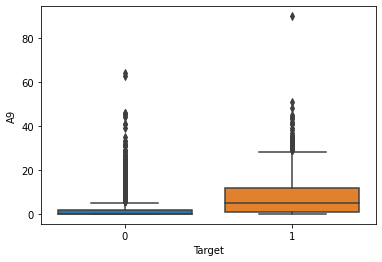

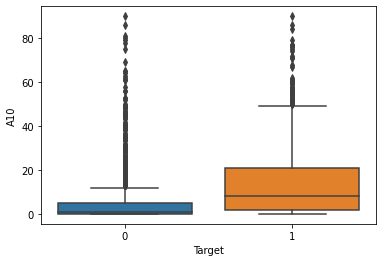

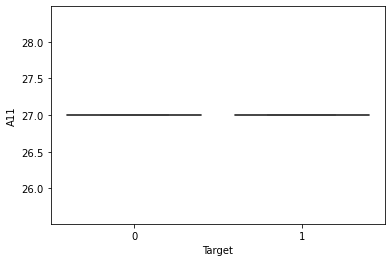

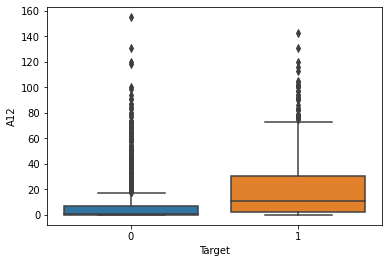

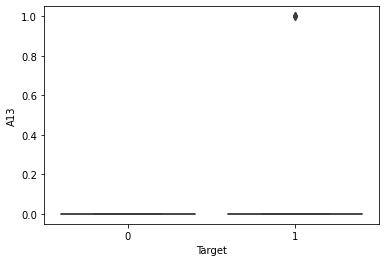

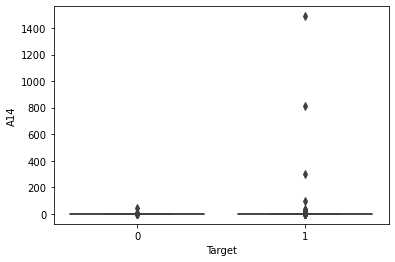

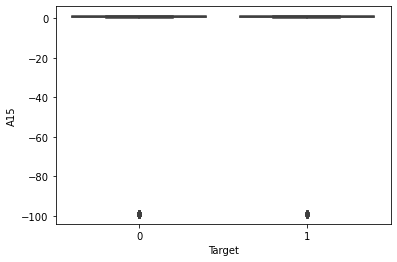

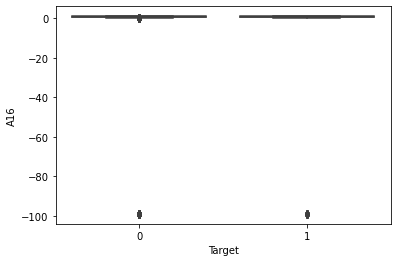

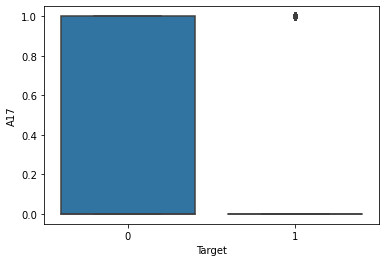

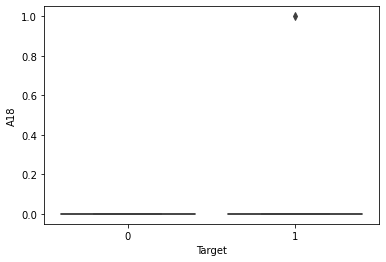

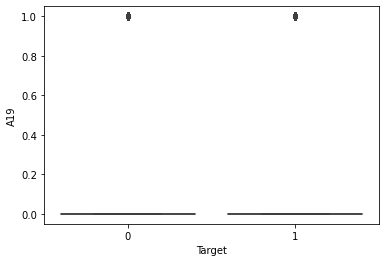

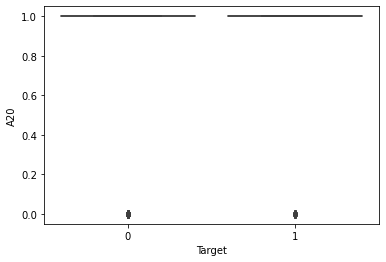

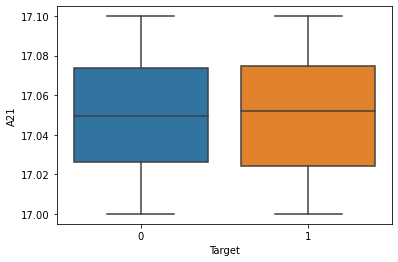

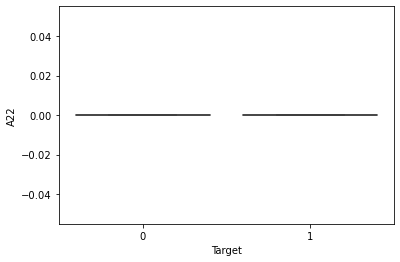

In [5]:
for var in [ 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18',
       'A19', 'A20', 'A21', 'A22']:
    sn.boxplot(x='Target',y=var,data=heart_df_test)
    plt.show()

# Exploratory Data analysis

In [6]:
heart_df.shape

(34292, 25)

In [7]:
heart_df_test.shape

(2239, 25)

In [8]:
heart_df.describe()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
count,3.429200e+04,34292.00000,34292.000000,32620.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,...,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000
mean,1.971469e+06,10.88770,0.814767,6.737063,0.667969,0.147994,24.729441,36.395165,46.089467,1.567946,...,0.277237,-5.188868,-4.879140,0.233553,0.000233,0.128456,0.973434,17.049571,0.000117,0.347049
std,6.368331e+05,17.18401,1.873390,3.582695,9.288744,5.421823,1163.295884,1719.519140,2111.464536,2.801714,...,7.408960,23.607379,23.011959,0.423097,0.015272,0.334601,0.160813,0.028793,0.010800,0.476038
min,1.058628e+06,-35.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000,0.000000
25%,1.459611e+06,1.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.590000,0.610000,0.000000,0.000000,0.000000,1.000000,17.024510,0.000000,0.000000
50%,1.833131e+06,4.00000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.800000,0.780000,0.000000,0.000000,0.000000,1.000000,17.049365,0.000000,0.000000
75%,2.246610e+06,12.00000,1.000000,8.000000,0.000000,0.000000,7.000000,12.000000,16.000000,2.000000,...,0.000000,0.950000,0.940000,0.000000,0.000000,0.000000,1.000000,17.074397,0.000000,1.000000
max,3.274754e+06,265.00000,151.000000,17.000000,1050.000000,508.000000,120000.000000,170880.000000,207160.000000,59.000000,...,638.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000,1.000000


In [9]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34292 entries, 0 to 34291
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      34292 non-null  int64  
 1   IV      34292 non-null  int64  
 2   A1      34292 non-null  int64  
 3   A2      32620 non-null  float64
 4   A3      34292 non-null  int64  
 5   A4      34292 non-null  int64  
 6   A5      34292 non-null  int64  
 7   A6      34292 non-null  int64  
 8   A7      34292 non-null  int64  
 9   A8      34292 non-null  int64  
 10  A9      34292 non-null  int64  
 11  A10     34292 non-null  int64  
 12  A11     34292 non-null  int64  
 13  A12     34292 non-null  int64  
 14  A13     34292 non-null  int64  
 15  A14     34292 non-null  int64  
 16  A15     34292 non-null  float64
 17  A16     34292 non-null  float64
 18  A17     34292 non-null  int64  
 19  A18     34292 non-null  int64  
 20  A19     34292 non-null  int64  
 21  A20     34292 non-null  int64  
 22

In [10]:
heart_df.nunique()

ID        22254
IV          120
A1           13
A2           17
A3           67
A4           30
A5          216
A6          262
A7          307
A8           17
A9           66
A10          94
A11           1
A12         151
A13           2
A14          49
A15         102
A16         102
A17           2
A18           2
A19           2
A20           2
A21       22227
A22           2
Target        2
dtype: int64

In [11]:
heart_df_test.describe()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
count,2.239000e+03,2239.000000,2239.000000,2125.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.0,2239.000000
mean,1.979633e+06,10.222867,0.777579,6.722824,0.644931,0.113444,19.248325,27.168379,35.181331,1.565431,...,1.332738,-5.322983,-5.014627,0.236713,0.000447,0.121929,0.976329,17.049975,0.0,0.359982
std,6.325057e+05,16.023550,1.540811,3.543232,7.882876,2.393877,231.987564,348.104905,467.228069,2.797784,...,36.501430,23.828936,23.245314,0.425159,0.021134,0.327277,0.152057,0.028525,0.0,0.480102
min,1.102124e+06,-34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,17.000009,0.0,0.000000
25%,1.473594e+06,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.570000,0.570000,0.000000,0.000000,0.000000,1.000000,17.025823,0.0,0.000000
50%,1.845490e+06,4.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.780000,0.780000,0.000000,0.000000,0.000000,1.000000,17.050490,0.0,0.000000
75%,2.248574e+06,12.000000,1.000000,8.000000,0.000000,0.000000,7.000000,12.000000,15.500000,2.000000,...,0.000000,0.940000,0.920000,0.000000,0.000000,0.000000,1.000000,17.074223,0.0,1.000000
max,3.274182e+06,96.000000,10.000000,17.000000,340.000000,90.000000,7800.000000,12900.000000,17700.000000,15.000000,...,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099891,0.0,1.000000


In [12]:
heart_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2239 non-null   int64  
 1   IV      2239 non-null   int64  
 2   A1      2239 non-null   int64  
 3   A2      2125 non-null   float64
 4   A3      2239 non-null   int64  
 5   A4      2239 non-null   int64  
 6   A5      2239 non-null   int64  
 7   A6      2239 non-null   int64  
 8   A7      2239 non-null   int64  
 9   A8      2239 non-null   int64  
 10  A9      2239 non-null   int64  
 11  A10     2239 non-null   int64  
 12  A11     2239 non-null   int64  
 13  A12     2239 non-null   int64  
 14  A13     2239 non-null   int64  
 15  A14     2239 non-null   int64  
 16  A15     2239 non-null   float64
 17  A16     2239 non-null   float64
 18  A17     2239 non-null   int64  
 19  A18     2239 non-null   int64  
 20  A19     2239 non-null   int64  
 21  A20     2239 non-null   int64  
 22  

In [13]:
heart_df_test.nunique()

ID        2239
IV         100
A1          11
A2          16
A3          27
A4          12
A5          92
A6         115
A7         142
A8          16
A9          51
A10         82
A11          1
A12        105
A13          2
A14         19
A15         97
A16         96
A17          2
A18          2
A19          2
A20          2
A21       2238
A22          1
Target       2
dtype: int64

# Data preprocessing 

# 1.Missing values  Handling:

In [14]:
missing_vals=heart_df.isnull().sum()
missing_vals

ID           0
IV           0
A1           0
A2        1672
A3           0
A4           0
A5           0
A6           0
A7           0
A8           0
A9           0
A10          0
A11          0
A12          0
A13          0
A14          0
A15          0
A16          0
A17          0
A18          0
A19          0
A20          0
A21          0
A22          0
Target       0
dtype: int64

Missing values are represented as NA in some columns and as -99 in some other columns

In [15]:
missing_vals_cols = missing_vals[missing_vals > 0].axes[0].tolist()
missing_vals_cols

['A2']

In [16]:
heart_df.loc[heart_df['A2'].isnull()]

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
11,1351269,2,3,NaN,0,0,0,0,0,0,...,0,-99.0,-99.0,0,0,0,1,17.045694,0,0
23,2113299,0,0,NaN,0,0,0,0,0,0,...,0,-99.0,-99.0,0,0,0,1,17.010649,0,0
31,1714469,77,2,NaN,0,0,0,0,0,0,...,0,-99.0,-99.0,1,0,0,1,17.036612,0,0
36,3255271,9,1,NaN,0,0,0,0,0,0,...,0,-99.0,-99.0,0,0,1,0,17.090984,0,0
48,1617048,50,0,NaN,0,0,0,0,0,1,...,0,-99.0,-99.0,1,0,1,1,17.024301,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34049,1124084,0,3,NaN,0,0,9,9,9,0,...,0,-99.0,-99.0,0,0,0,1,17.003316,0,1
34131,1654371,0,1,NaN,0,0,0,0,0,3,...,0,-99.0,-99.0,0,0,1,0,17.020685,0,1
34151,1653899,0,0,NaN,0,0,0,5,5,1,...,0,-99.0,-99.0,1,0,0,1,17.088681,0,1
34205,1645651,2,0,NaN,0,0,16,24,32,12,...,0,-99.0,-99.0,0,0,0,1,17.026863,0,1


In [17]:
missing_vals1=heart_df_test.isnull().sum()
missing_vals1

ID          0
IV          0
A1          0
A2        114
A3          0
A4          0
A5          0
A6          0
A7          0
A8          0
A9          0
A10         0
A11         0
A12         0
A13         0
A14         0
A15         0
A16         0
A17         0
A18         0
A19         0
A20         0
A21         0
A22         0
Target      0
dtype: int64

In [18]:
missing_vals_cols1 = missing_vals1[missing_vals1 > 0].axes[0].tolist()
missing_vals_cols1

['A2']

In [19]:
heart_df_test.loc[heart_df_test['A2'].isnull()]

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
3,3144582,0,3,NaN,0,0,0,1,1,0,...,0,-99.0,-99.0,0,0,0,0,17.027939,0,0
41,2059159,0,0,NaN,0,0,0,0,0,0,...,0,-99.0,-99.0,0,0,1,1,17.070933,0,0
52,2112093,33,1,NaN,0,0,0,0,0,3,...,0,-99.0,-99.0,1,0,0,1,17.048153,0,0
93,1652788,9,0,NaN,0,0,0,0,0,0,...,0,-99.0,-99.0,0,0,0,1,17.097102,0,0
97,3058488,1,0,NaN,0,0,0,0,0,0,...,0,-99.0,-99.0,0,0,0,0,17.034515,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,1172791,0,0,NaN,0,0,13,22,25,0,...,0,-99.0,-99.0,0,0,0,1,17.047426,0,1
2056,1216738,-1,0,NaN,0,1,3,3,3,0,...,0,-99.0,-99.0,1,0,0,1,17.072951,0,1
2083,1278332,1,1,NaN,1,0,0,0,0,4,...,0,-99.0,-99.0,0,0,1,0,17.013314,0,1
2095,2869063,-2,0,NaN,0,2,12,12,12,0,...,0,-99.0,-99.0,0,0,0,1,17.039413,0,1


How are you planning to work with missing values? First, different representations must be ## brought to same representation and then you may choose one of the imputation methods/ ## choose to eliminate the records. In either case justify your actions.

In [20]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  1672
since it is only 5 percent of the entire dataset the rows with missing values are excluded.


In [21]:
count=0
for i in heart_df_test.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df_test.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  114
since it is only 5 percent of the entire dataset the rows with missing values are excluded.


since it is only 5 percent of the entire dataset the rows with missing values are excluded.

In [22]:
heart_df.dropna(axis=0,inplace=True)

In [23]:
heart_df_test.dropna(axis=0,inplace=True)

In [24]:
heart_df.isnull().sum()

ID        0
IV        0
A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
A16       0
A17       0
A18       0
A19       0
A20       0
A21       0
A22       0
Target    0
dtype: int64

In [25]:
heart_df_test.isnull().sum()

ID        0
IV        0
A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
A16       0
A17       0
A18       0
A19       0
A20       0
A21       0
A22       0
Target    0
dtype: int64

<AxesSubplot:>

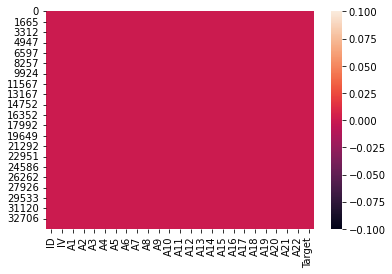

In [26]:
sn.heatmap(heart_df.isnull())

<AxesSubplot:>

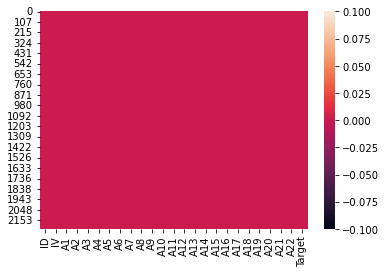

In [27]:
sn.heatmap(heart_df_test.isnull())

In [28]:
heart_df=heart_df[ (heart_df['A16'] > 0)]

In [29]:
heart_df_test=heart_df_test[ (heart_df_test['A16'] > 0)]

In [30]:
heart_df=heart_df[ (heart_df['A15'] > 0)]

In [31]:
heart_df_test=heart_df_test[ (heart_df_test['A15'] > 0)]

# Visuvalizations   

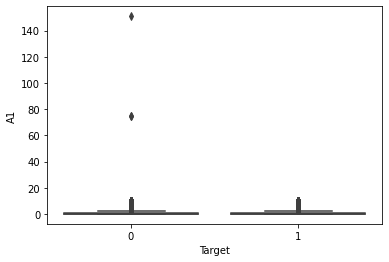

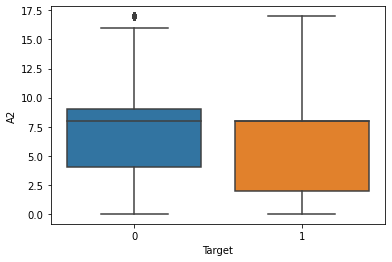

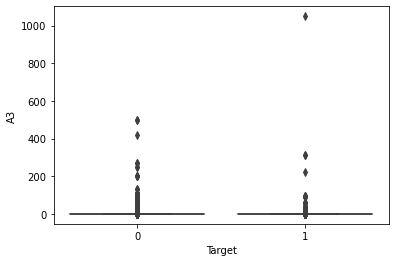

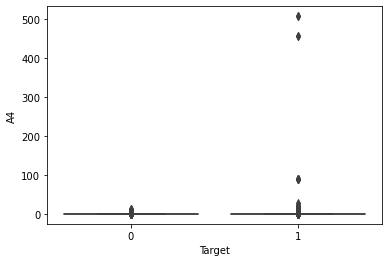

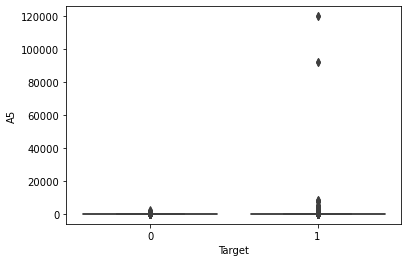

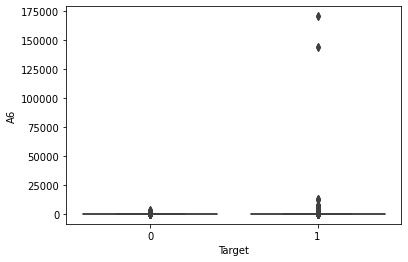

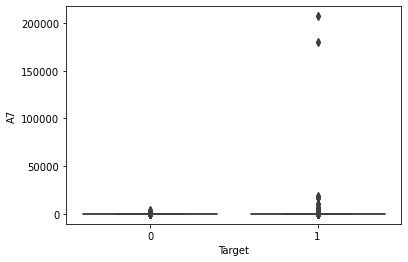

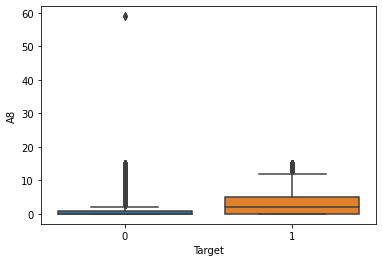

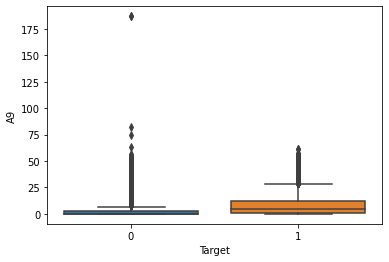

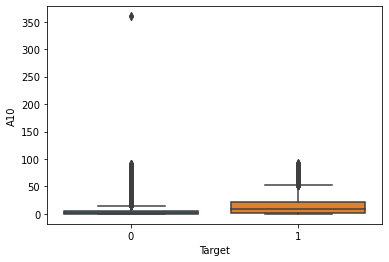

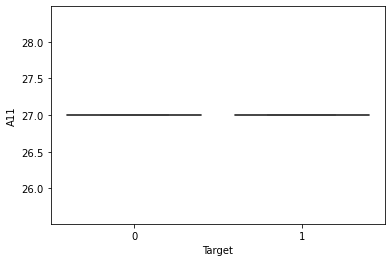

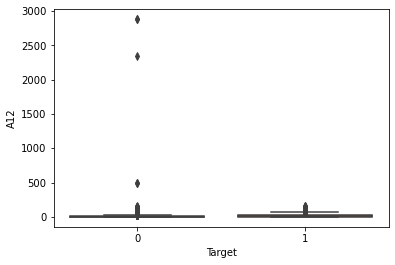

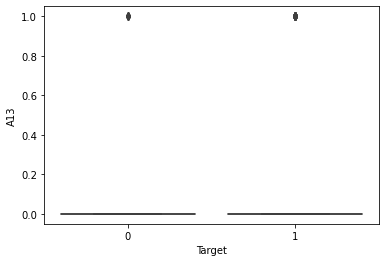

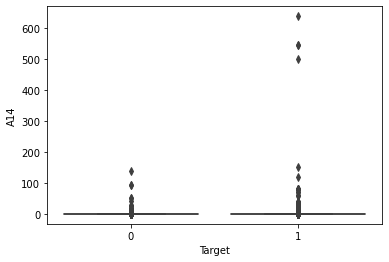

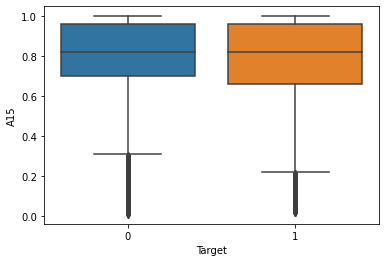

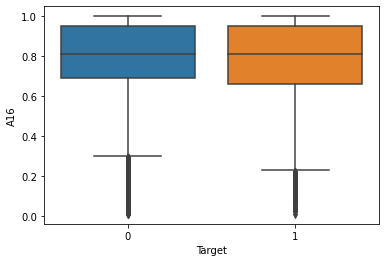

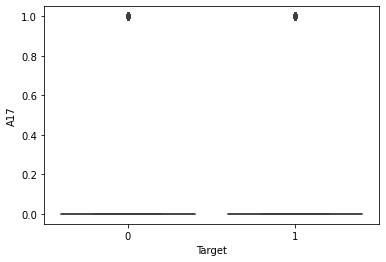

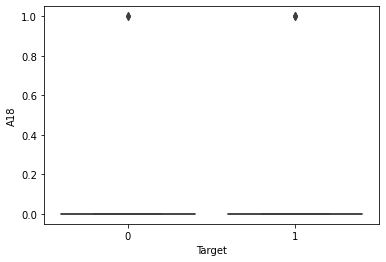

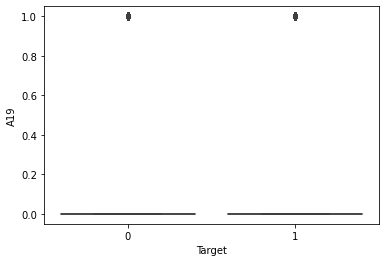

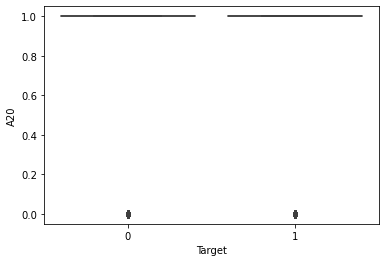

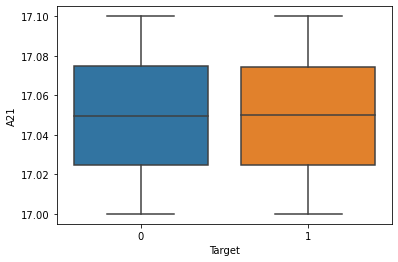

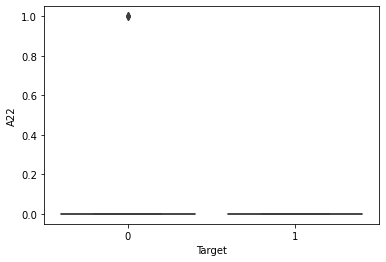

In [32]:
for var in [ 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18',
       'A19', 'A20', 'A21', 'A22']:
    sn.boxplot(x='Target',y=var,data=heart_df)
    plt.show()

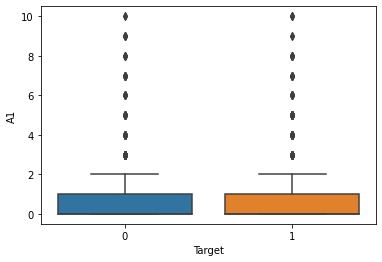

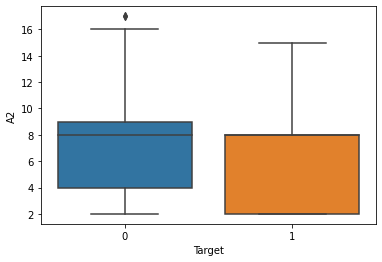

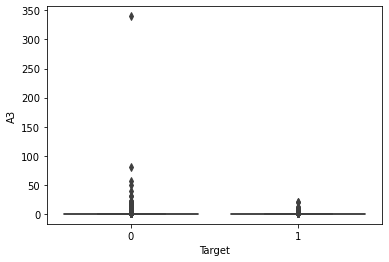

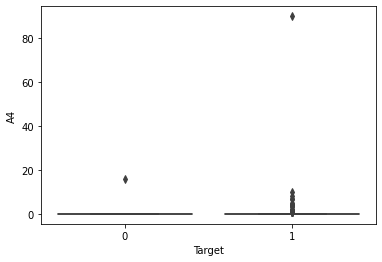

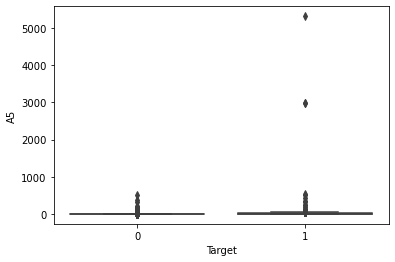

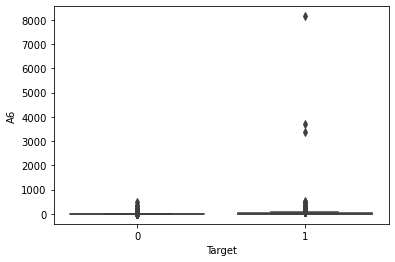

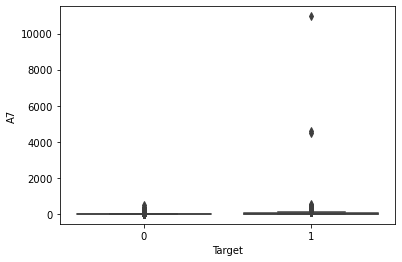

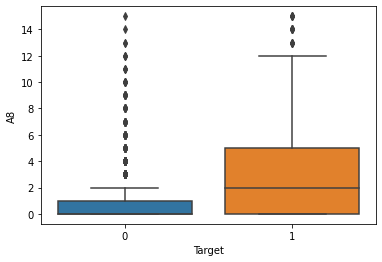

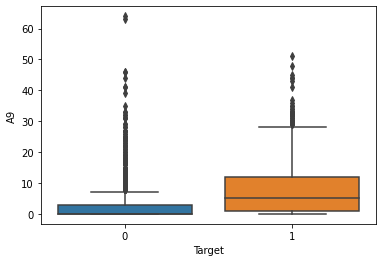

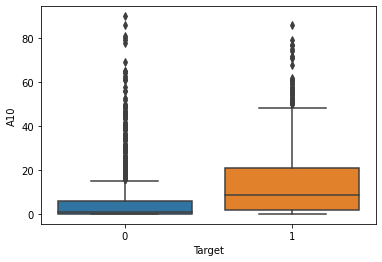

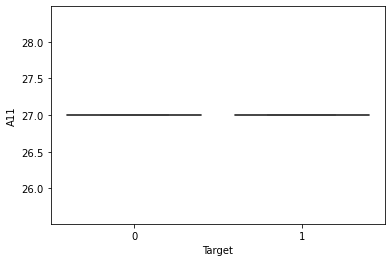

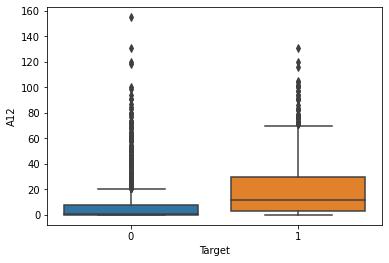

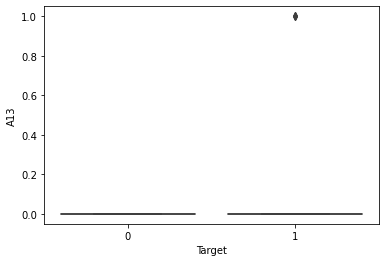

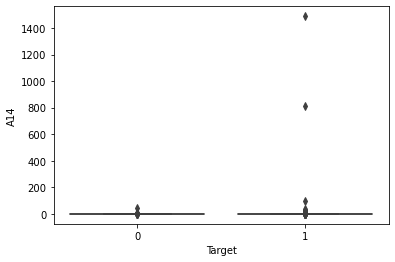

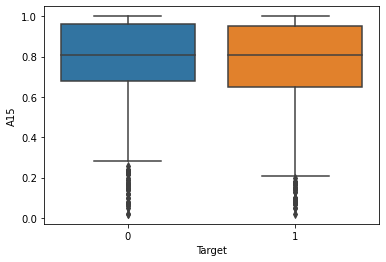

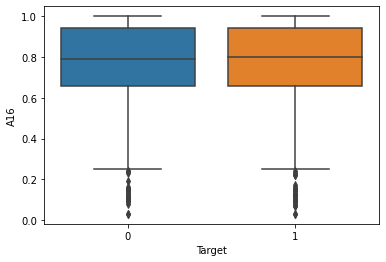

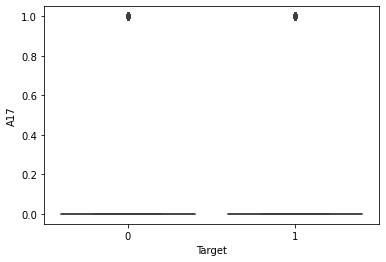

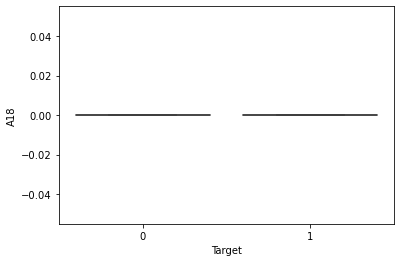

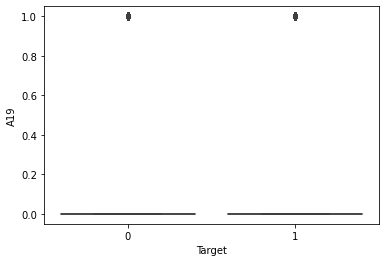

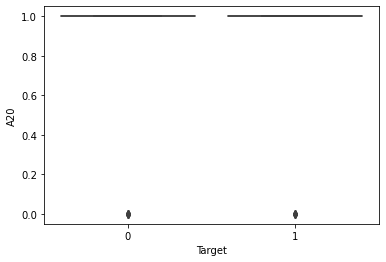

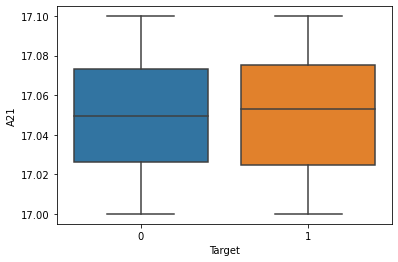

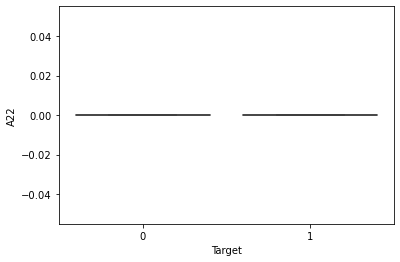

In [33]:
for var in [ 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18',
       'A19', 'A20', 'A21', 'A22']:
    sn.boxplot(x='Target',y=var,data=heart_df_test)
    plt.show()

A15, A16 Columns are having -99 as null values so it can be detected by box plot and then removed .

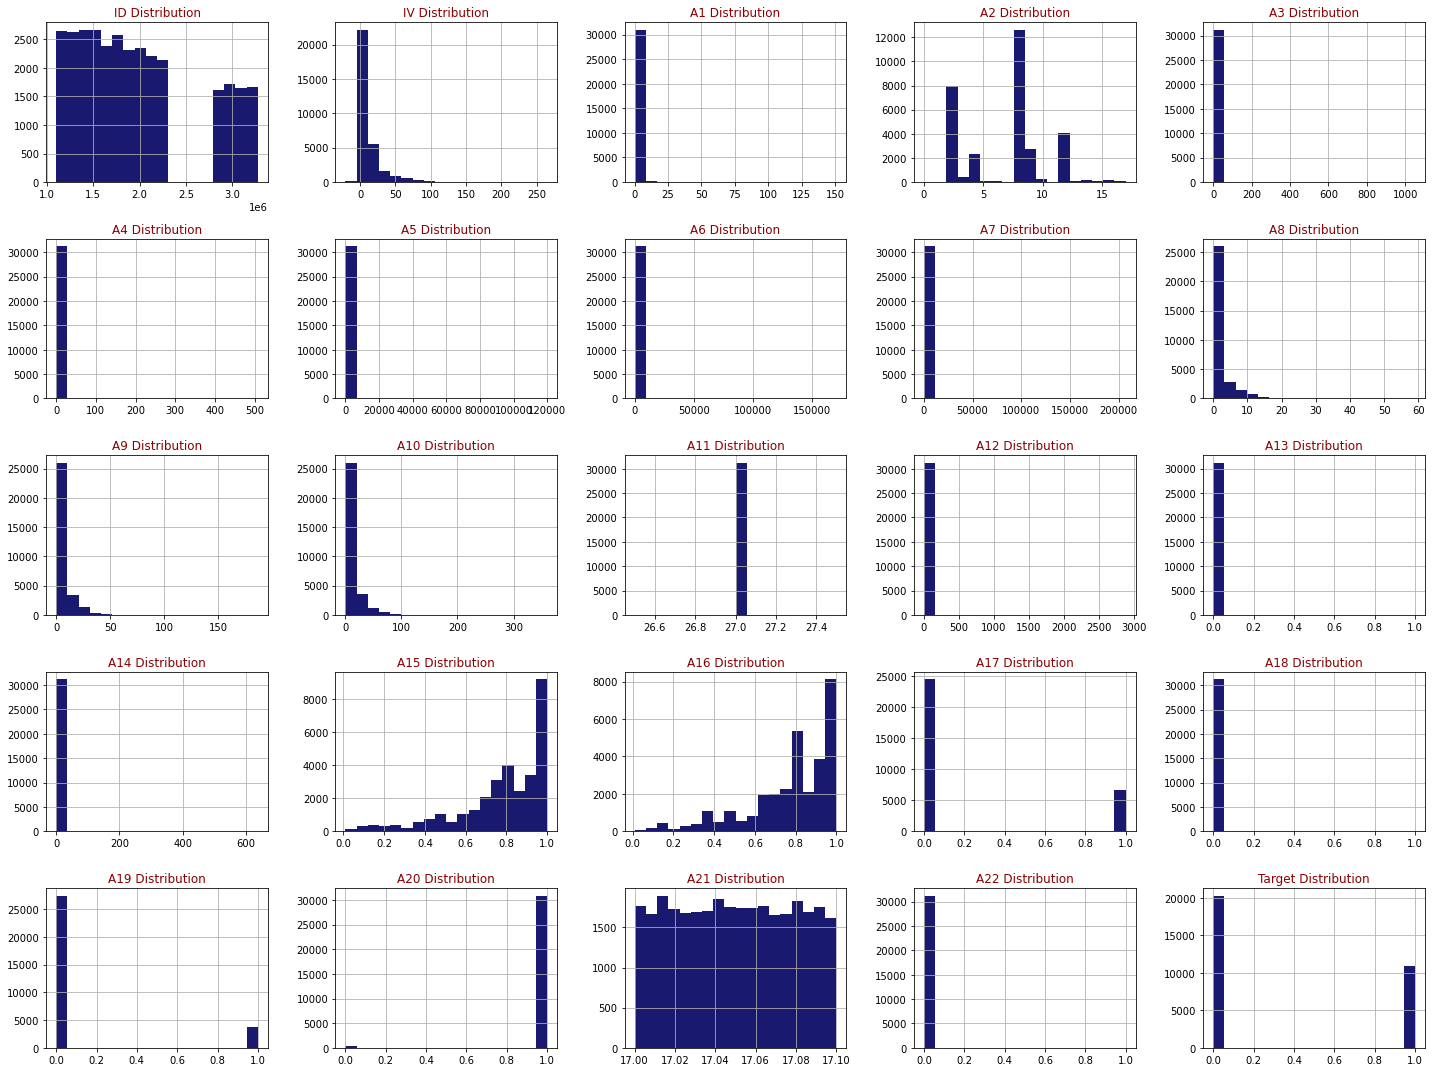

In [34]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(5,5,i+1)
        dataframe[feature].hist(bins=18,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

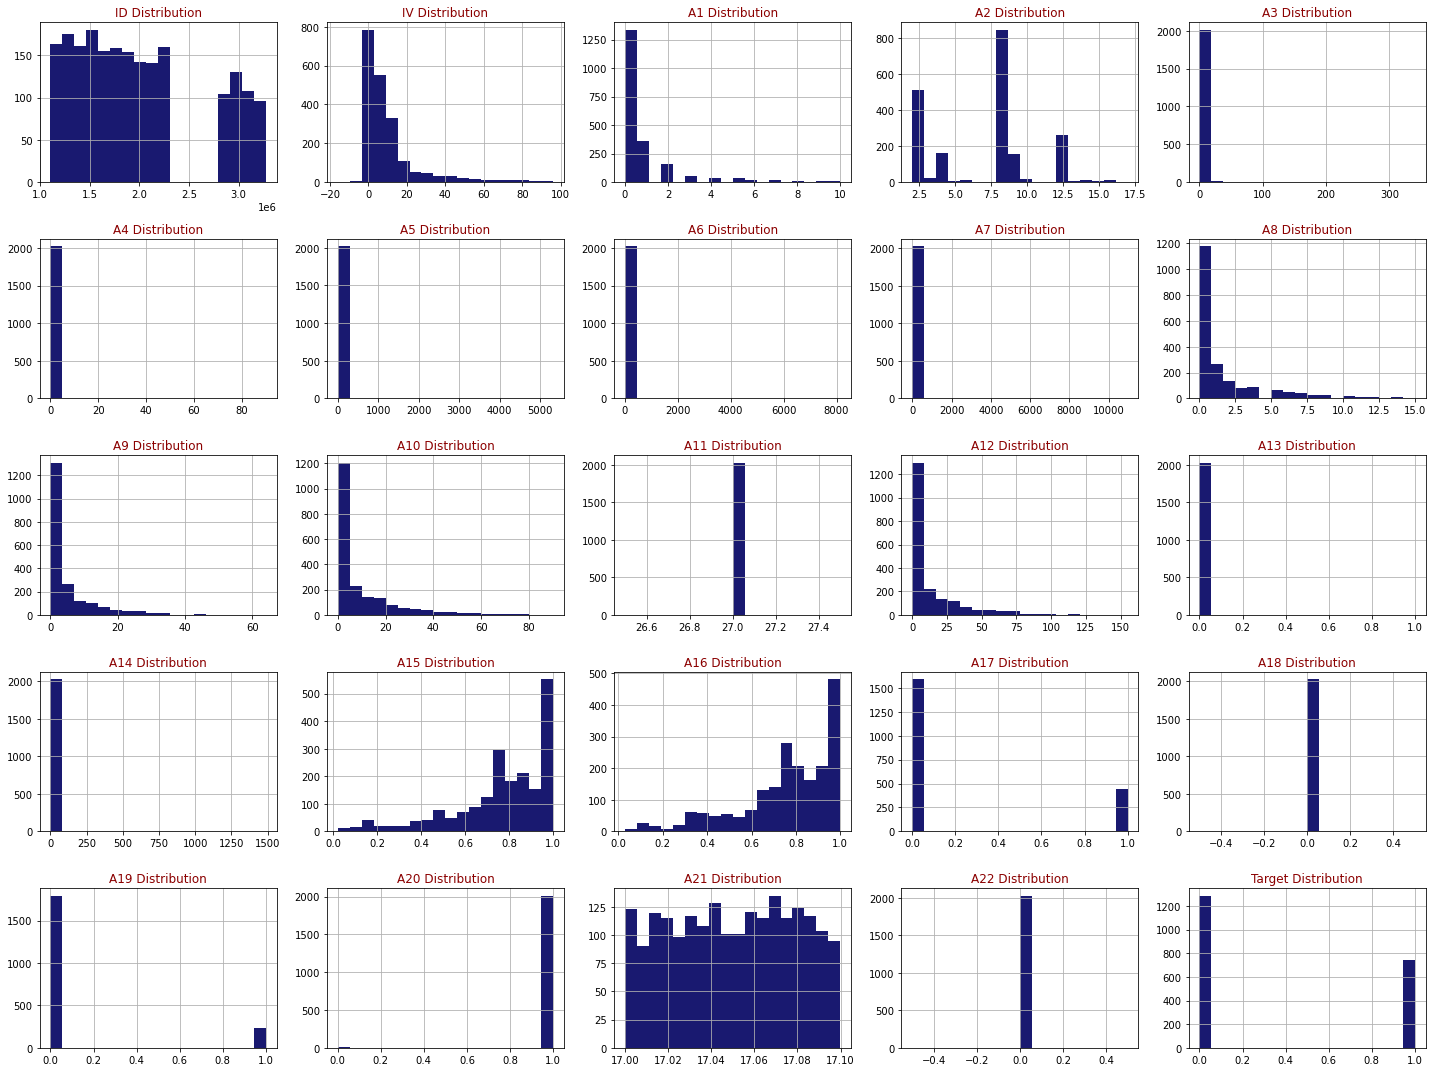

In [35]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(5,5,i+1)
        dataframe[feature].hist(bins=18,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df_test,heart_df_test.columns,6,3)

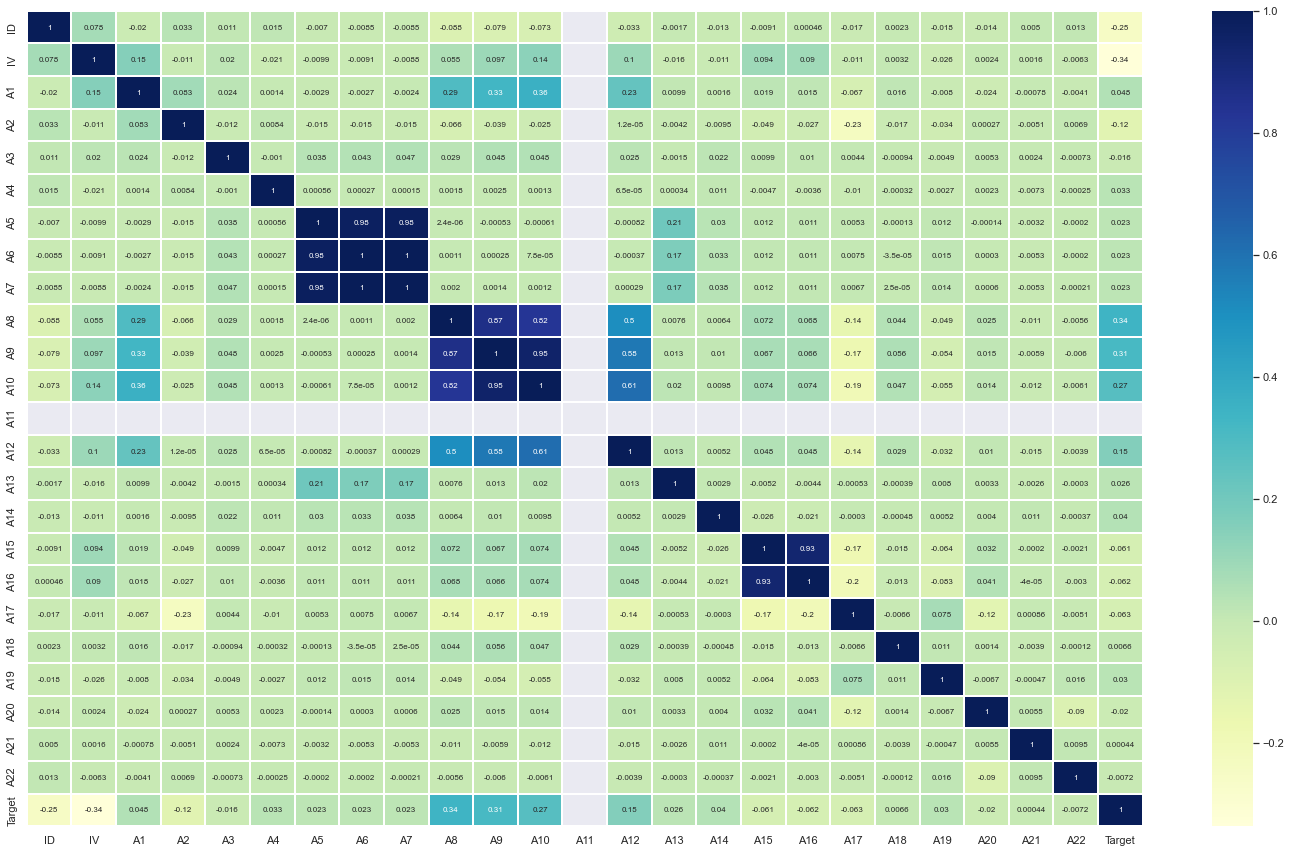

In [36]:
from statsmodels.tsa.x13 import x13_arima_select_order
sn.set(rc = {'figure.figsize':(25,15)})
sn.heatmap(heart_df.corr(), cmap="YlGnBu", linewidths=0.1, annot=True, annot_kws={"fontsize":8})
plt.show()

From the above heatmap we can see the columns A5,A6,A7 and A8,A9,A10,A12 and A15,A16 are highly correlated. Hence its better to remove one of the columns to get rid to multicollinearity.

Patient ID is not usefull for prediction so we can drop this column 

In [37]:
heart_df =heart_df.drop(['A11','ID'], axis = 1)

In [38]:
heart_df_test =heart_df_test.drop(['A11','ID'], axis = 1)

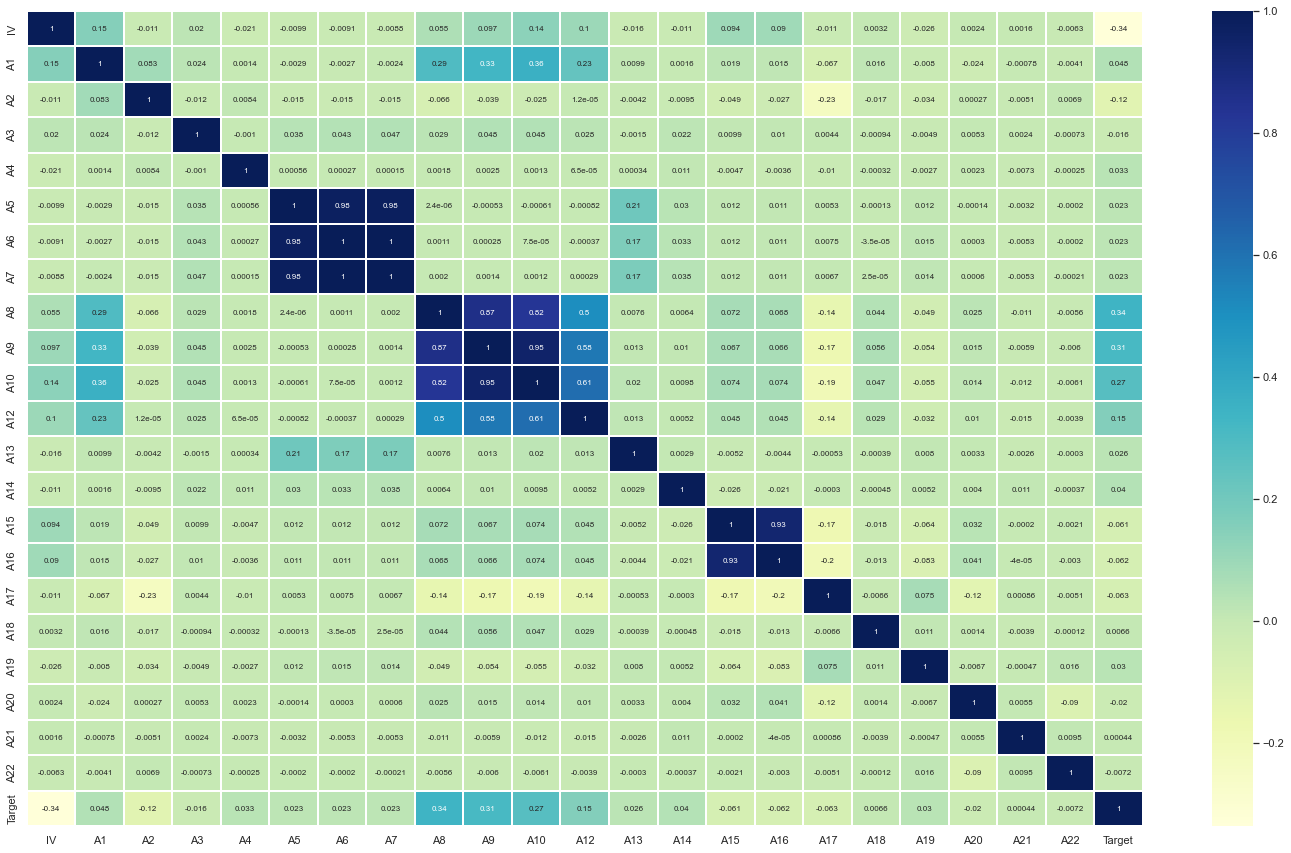

In [39]:
from statsmodels.tsa.x13 import x13_arima_select_order
sn.set(rc = {'figure.figsize':(25,15)})
sn.heatmap(heart_df.corr(), cmap="YlGnBu", linewidths=0.1, annot=True, annot_kws={"fontsize":8})
plt.show()

From the above heatmap we can see the columns A5,A6,A7 and A8,A9,A10,A12 and A15,A16 are highly correlated. Hence its better to remove one of the columns to get rid to multicollinearity.

In [40]:
heart_df = heart_df.drop(['A6','A8','A10','A12','A7','A16'], axis = 1)

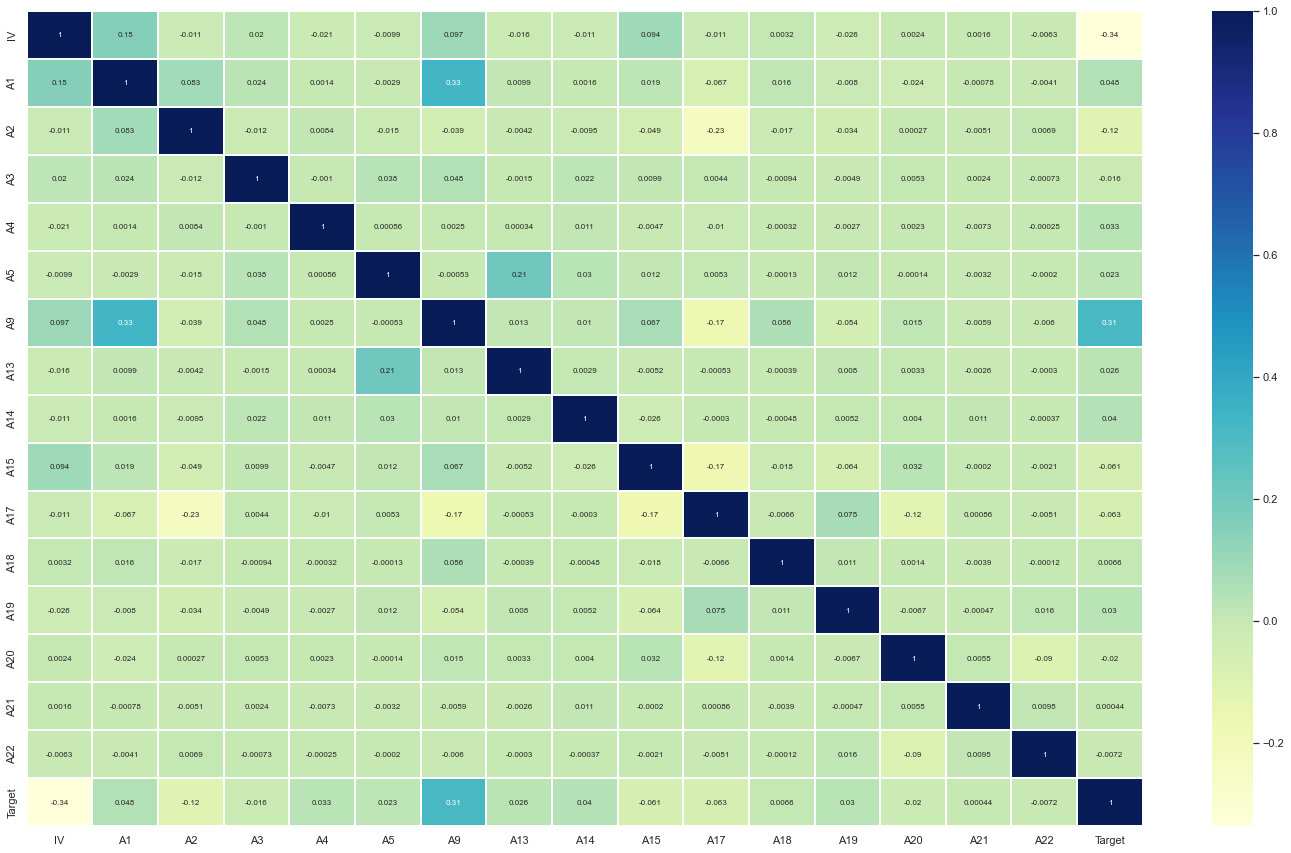

In [41]:
from statsmodels.tsa.x13 import x13_arima_select_order
sn.set(rc = {'figure.figsize':(25,15)})
sn.heatmap(heart_df.corr(), cmap="YlGnBu", linewidths=0.1, annot=True, annot_kws={"fontsize":8})
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

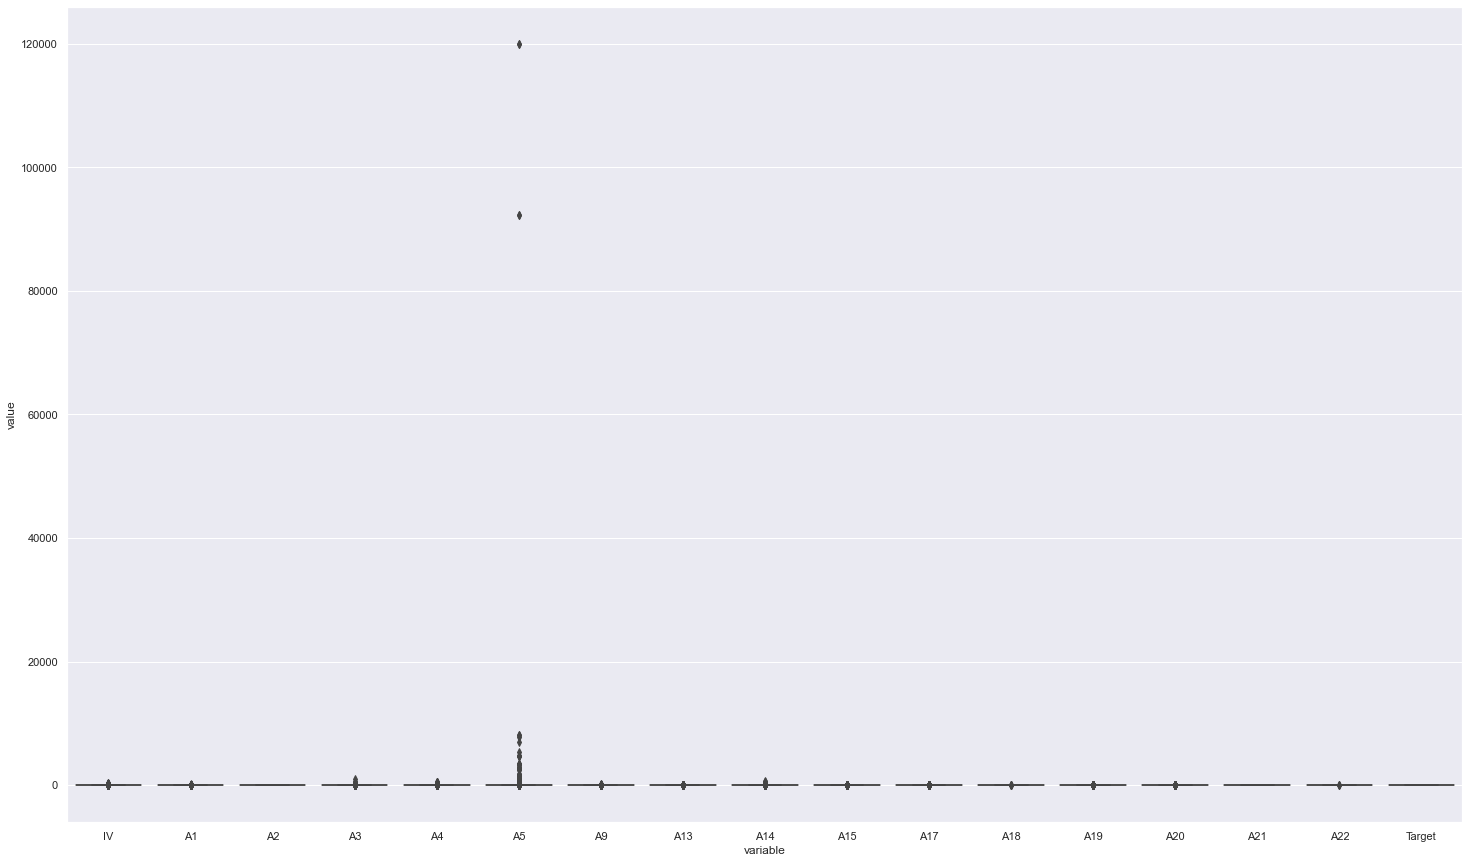

In [42]:
sn.boxplot(x="variable", y="value", data=pd.melt(heart_df))

# INSIGHTS

By the visualization method I came to Know that there was an high correlation between some of the A5,A6,A7 and A8,A9,A10,A12 and A15,A16.so this will cause for multicolinearity.

also using Box plot I came to know that there was an outliers in some of the columns that can be imputed with upper and lower limts of the columns.

# 2. Outlier detection  using IQR Method

In [43]:
percentile25 = heart_df['A5'].quantile(0.25)
percentile75 = heart_df['A5'].quantile(0.75)

In [44]:
iqr = percentile75 - percentile25

In [45]:
iqr

7.0

In [46]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [47]:
heart_df[heart_df['A5'] > upper_limit]

,IV,A1,A2,A3,A4,A5,A9,A13,A14,A15,A17,A18,A19,A20,A21,A22,Target
25,8,0,8.0,1,0,34,20,0,0,0.79,0,0,0,1,17.037799,0,0
92,0,2,2.0,0,0,35,0,0,0,0.86,0,0,0,1,17.060281,0,0
110,0,0,2.0,0,0,45,0,0,0,0.44,1,0,0,1,17.009103,0,0
113,30,0,8.0,8,0,31,27,0,0,0.97,0,0,0,1,17.044216,0,0
168,8,4,8.0,0,0,18,5,0,0,0.83,0,0,0,1,17.003722,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34269,0,0,13.0,0,0,20,16,0,0,0.80,0,0,0,1,17.082769,0,1
34271,1,0,8.0,0,0,50,17,0,0,0.70,0,0,0,1,17.004631,0,1
34281,1,2,14.0,0,0,27,9,0,0,0.41,0,0,0,1,17.015093,0,1
34284,7,0,4.0,0,0,35,22,0,0,0.99,0,0,0,1,17.015690,0,1


In [48]:
heart_df[heart_df['A5'] > upper_limit].count()

IV        3976
A1        3976
A2        3976
A3        3976
A4        3976
A5        3976
A9        3976
A13       3976
A14       3976
A15       3976
A17       3976
A18       3976
A19       3976
A20       3976
A21       3976
A22       3976
Target    3976
dtype: int64

it is not a good for removing the outliers because all the outliers are not influential outliers some of the outliers are very useful for our prediction 
so it is better to use one of the imputation method that is quantile based flooring and caping

# Handling Outliers using quantile based flooring and caping method

<AxesSubplot:>

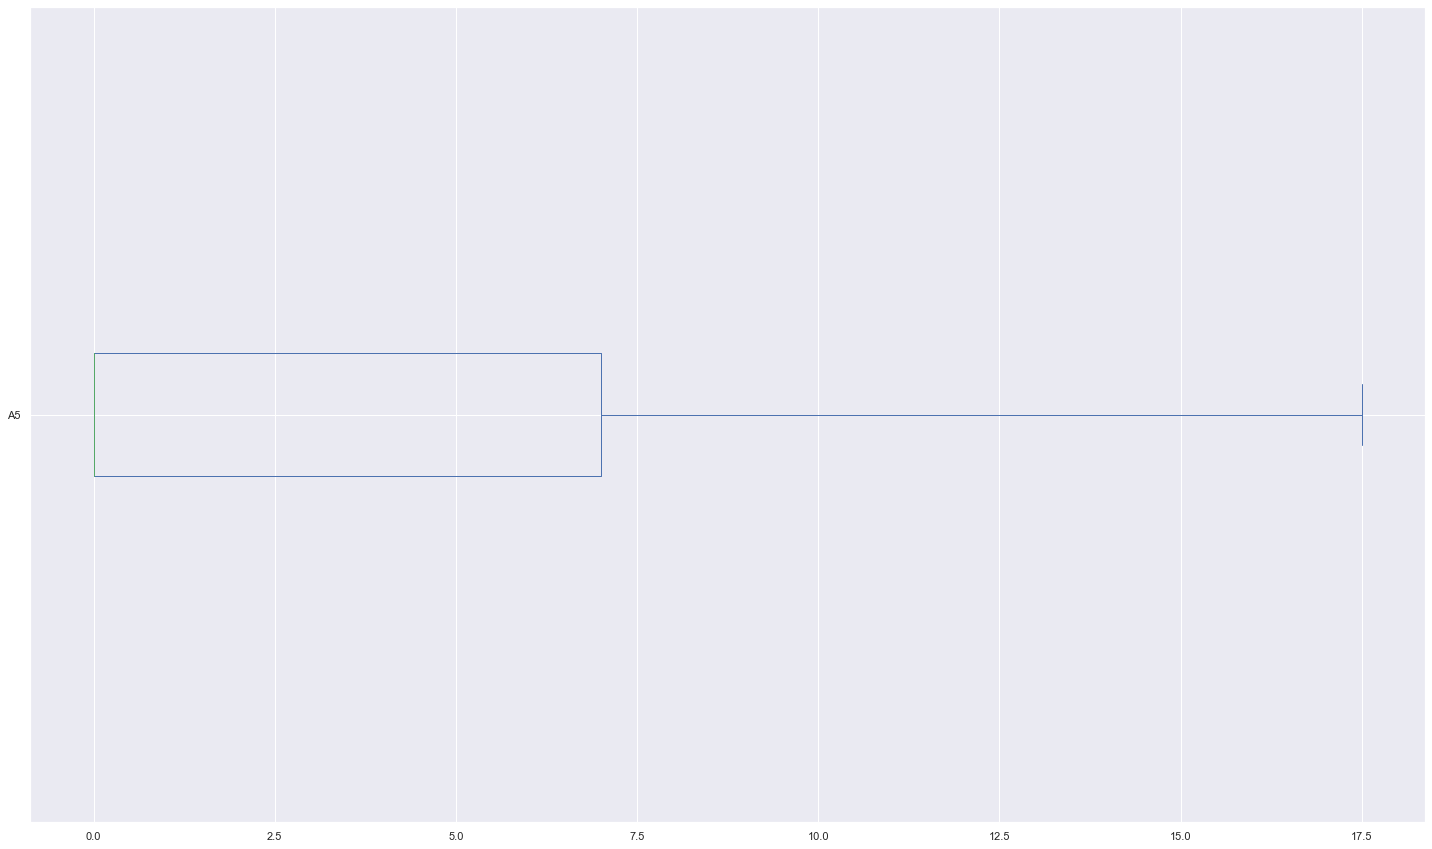

In [49]:
heart_df['A5'] = np.where(
    heart_df['A5'] > upper_limit,
    upper_limit,
    np.where(
        heart_df['A5'] < lower_limit,
        lower_limit,
        heart_df['A5']
    )
)
heart_df['A5'].plot(kind='box',vert=False)

<AxesSubplot:>

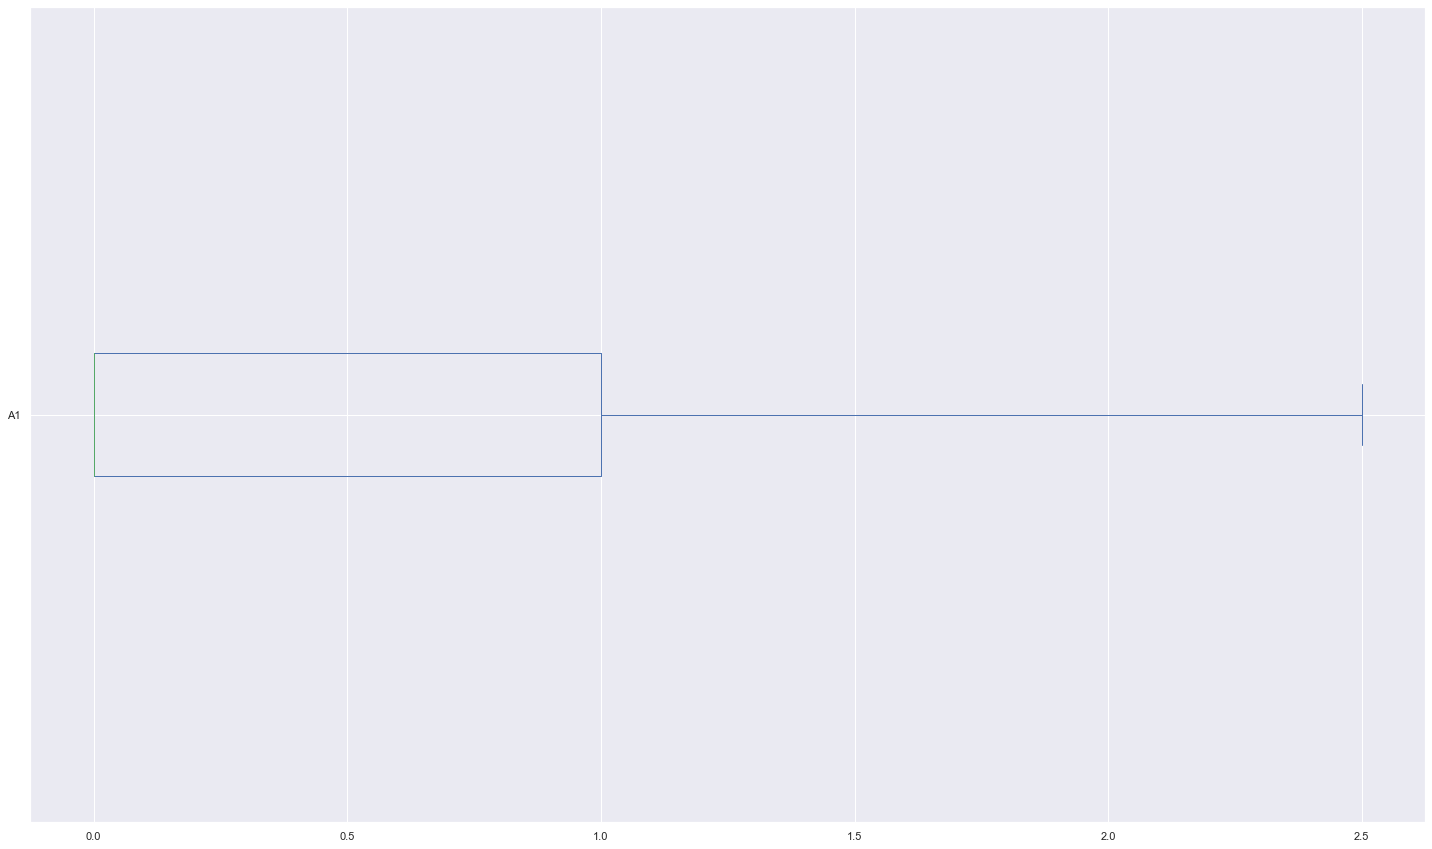

In [50]:
percentile25 = heart_df['A1'].quantile(0.25)
percentile75 = heart_df['A1'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
heart_df[heart_df['A1'] > upper_limit]
heart_df[heart_df['A1'] > upper_limit].count()


heart_df['A1'] = np.where(
    heart_df['A1'] > upper_limit,
    upper_limit,
    np.where(
        heart_df['A1'] < lower_limit,
        lower_limit,
        heart_df['A1']
    )
)
heart_df['A1'].plot(kind='box',vert=False)

Visuvalizations for test data set

In [51]:
heart_df_test =heart_df_test.drop(['A22'], axis = 1)

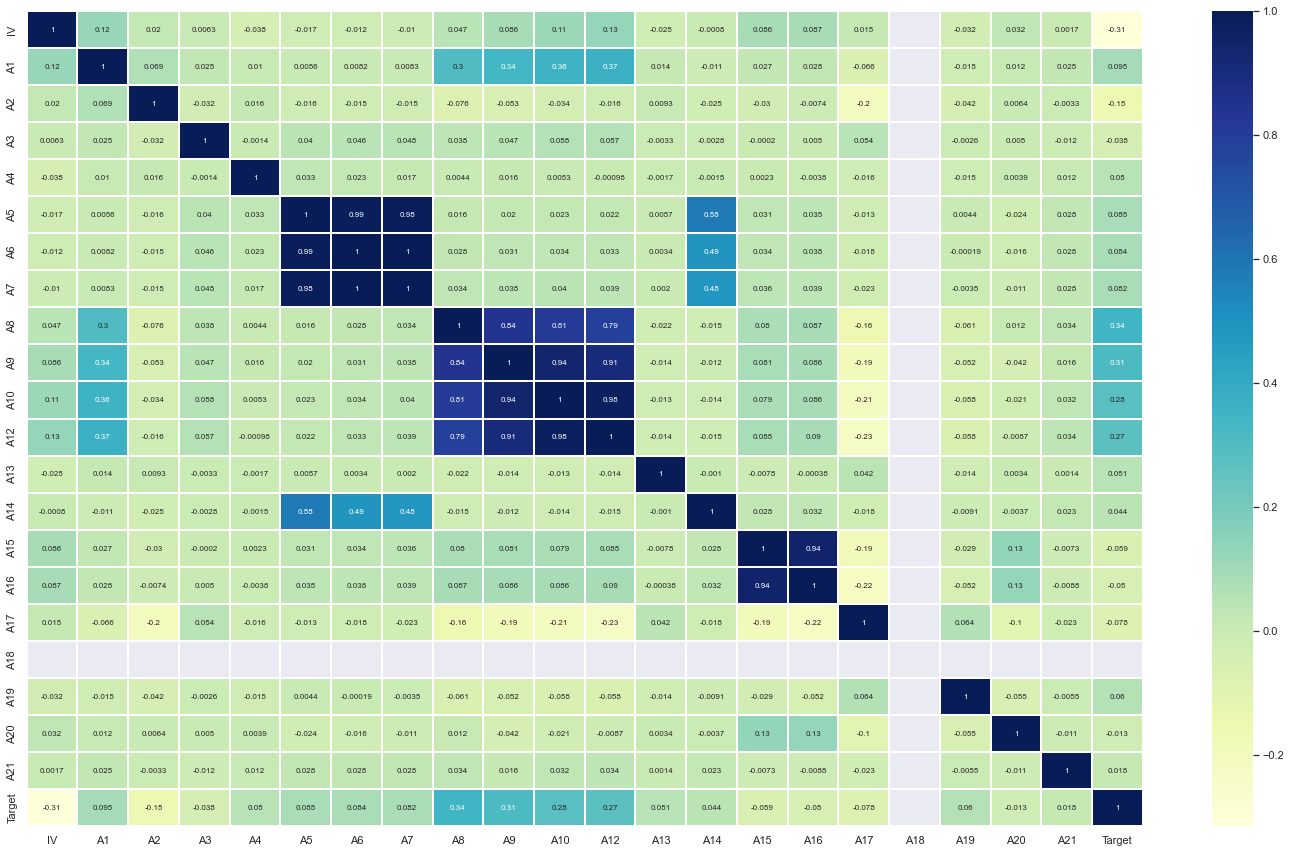

In [52]:
from statsmodels.tsa.x13 import x13_arima_select_order
sn.set(rc = {'figure.figsize':(25,15)})
sn.heatmap(heart_df_test.corr(), cmap="YlGnBu", linewidths=0.1, annot=True, annot_kws={"fontsize":8})
plt.show()

From the above heatmap we can see the columns A5,A6,A7 and A8,A9,A10,A12 and A15,A16 are highly correlated. Hence its better to remove one of the columns to get rid to multicollinearity.

In [53]:
heart_df_test= heart_df_test.drop(['A6','A8','A10','A12','A7','A16'], axis = 1)

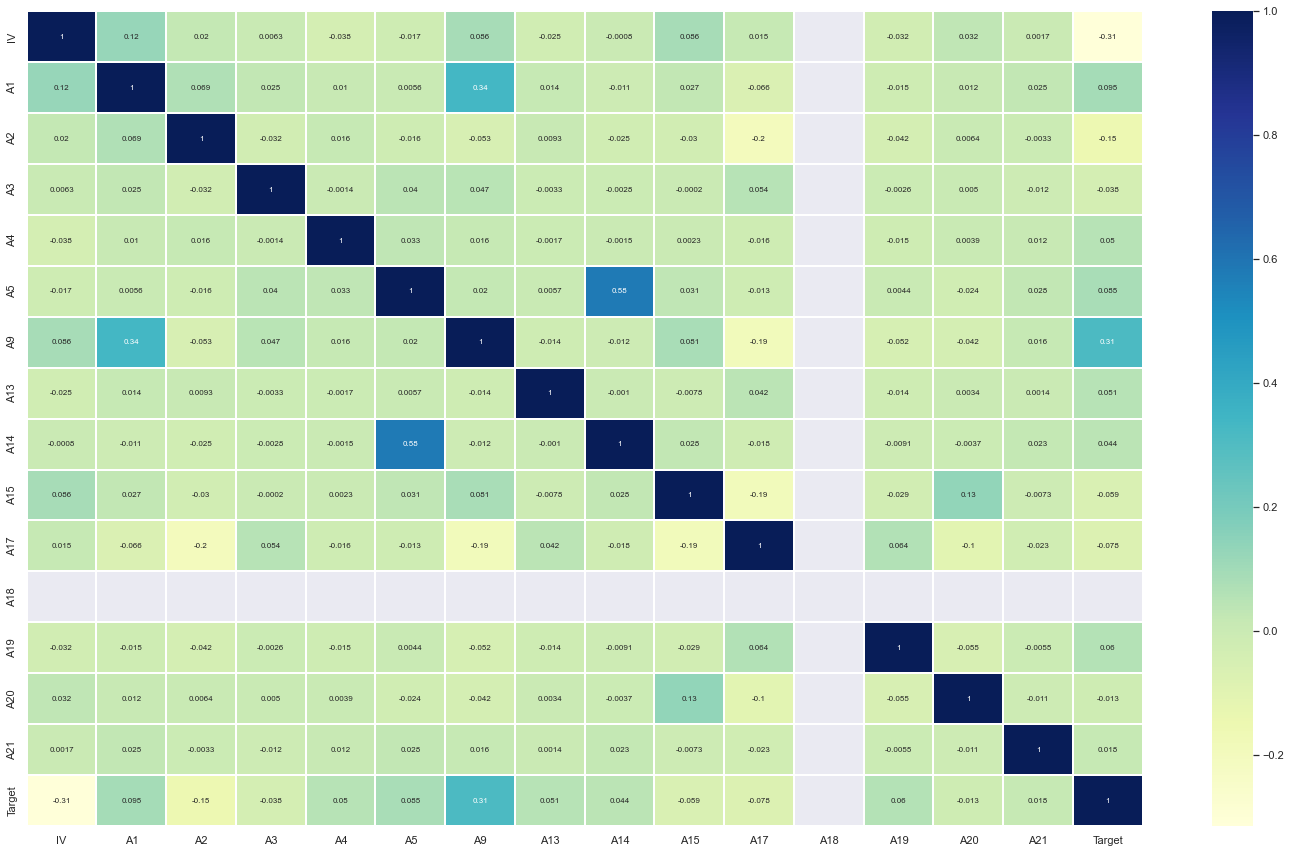

In [54]:
from statsmodels.tsa.x13 import x13_arima_select_order
sn.set(rc = {'figure.figsize':(25,15)})
sn.heatmap(heart_df_test.corr(), cmap="YlGnBu", linewidths=0.1, annot=True, annot_kws={"fontsize":8})
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

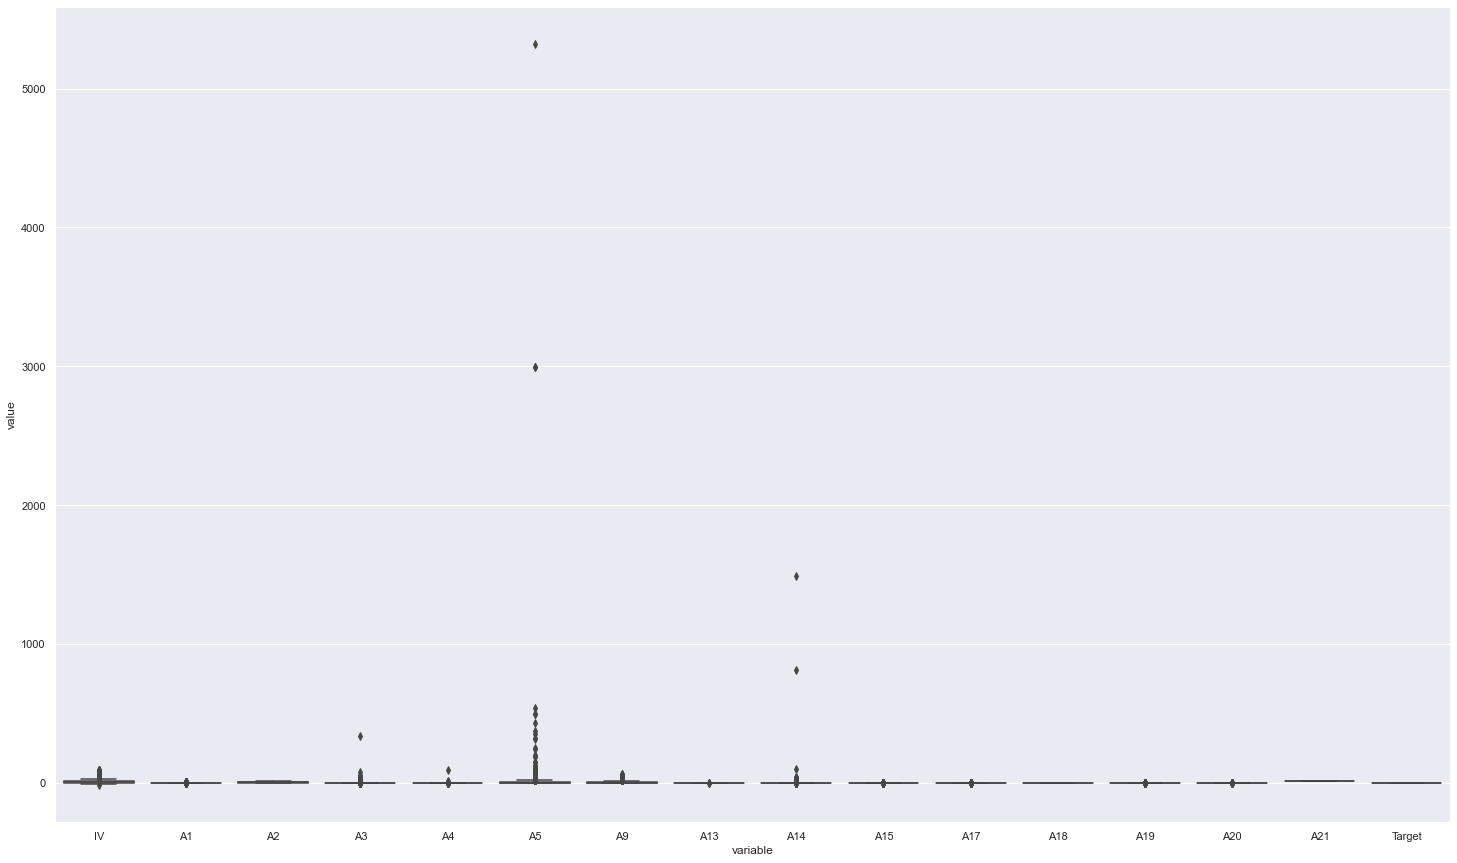

In [55]:
sn.boxplot(x="variable", y="value", data=pd.melt(heart_df_test))

In [56]:
percentile25 = heart_df_test['A5'].quantile(0.25)
percentile75 = heart_df_test['A5'].quantile(0.75)

In [57]:
iqr = percentile75 - percentile25

In [58]:
iqr

8.0

In [59]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [60]:
heart_df_test[heart_df_test['A5'] > upper_limit]

,IV,A1,A2,A3,A4,A5,A9,A13,A14,A15,A17,A18,A19,A20,A21,Target
10,0,4,2.0,22,0,27,29,0,0,0.90,0,0,0,1,17.013036,0
20,0,1,4.0,0,0,85,0,0,0,0.68,1,0,0,1,17.028354,0
74,39,0,4.0,18,0,70,32,0,0,0.73,1,0,0,1,17.022595,0
103,0,0,8.0,0,0,34,0,0,0,0.85,0,0,0,1,17.090647,0
235,33,0,4.0,0,0,23,26,0,0,0.87,0,0,0,1,17.037223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,7,1,8.0,0,0,24,16,0,0,0.98,0,0,0,1,17.038471,1
2214,2,1,8.0,0,0,23,12,0,0,0.98,0,0,0,1,17.038926,1
2216,0,8,2.0,0,0,540,0,0,0,0.96,0,0,1,1,17.056535,1
2217,2,6,8.0,1,0,36,24,0,0,0.86,0,0,0,1,17.006922,1


In [61]:
heart_df_test[heart_df_test['A5'] > upper_limit].count()

IV        196
A1        196
A2        196
A3        196
A4        196
A5        196
A9        196
A13       196
A14       196
A15       196
A17       196
A18       196
A19       196
A20       196
A21       196
Target    196
dtype: int64

<AxesSubplot:>

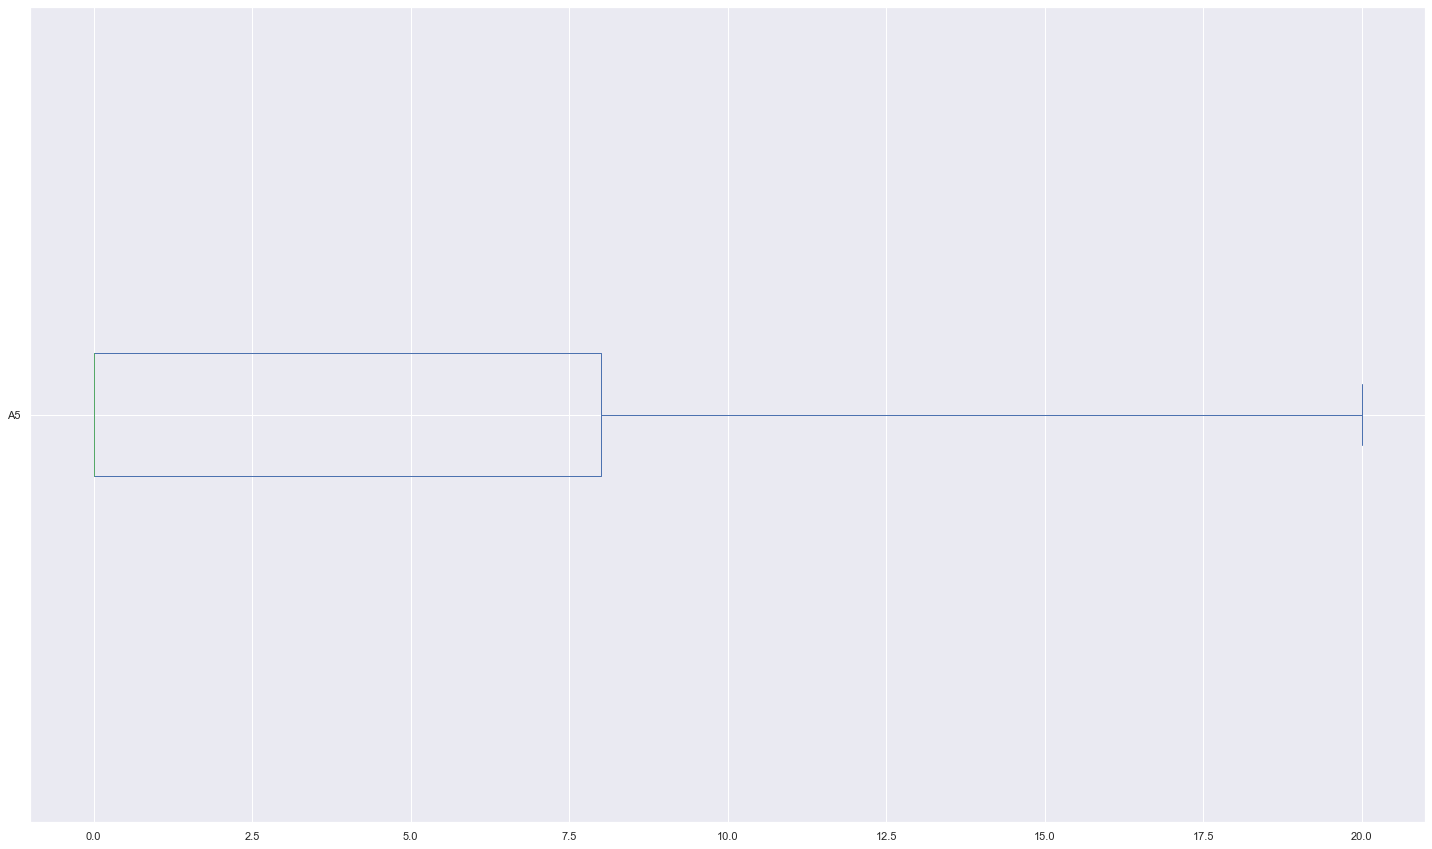

In [62]:
heart_df_test['A5'] = np.where(
    heart_df_test['A5'] > upper_limit,
    upper_limit,
    np.where(
        heart_df_test['A5'] < lower_limit,
        lower_limit,
        heart_df_test['A5']
    )
)
heart_df_test['A5'].plot(kind='box',vert=False)

<AxesSubplot:>

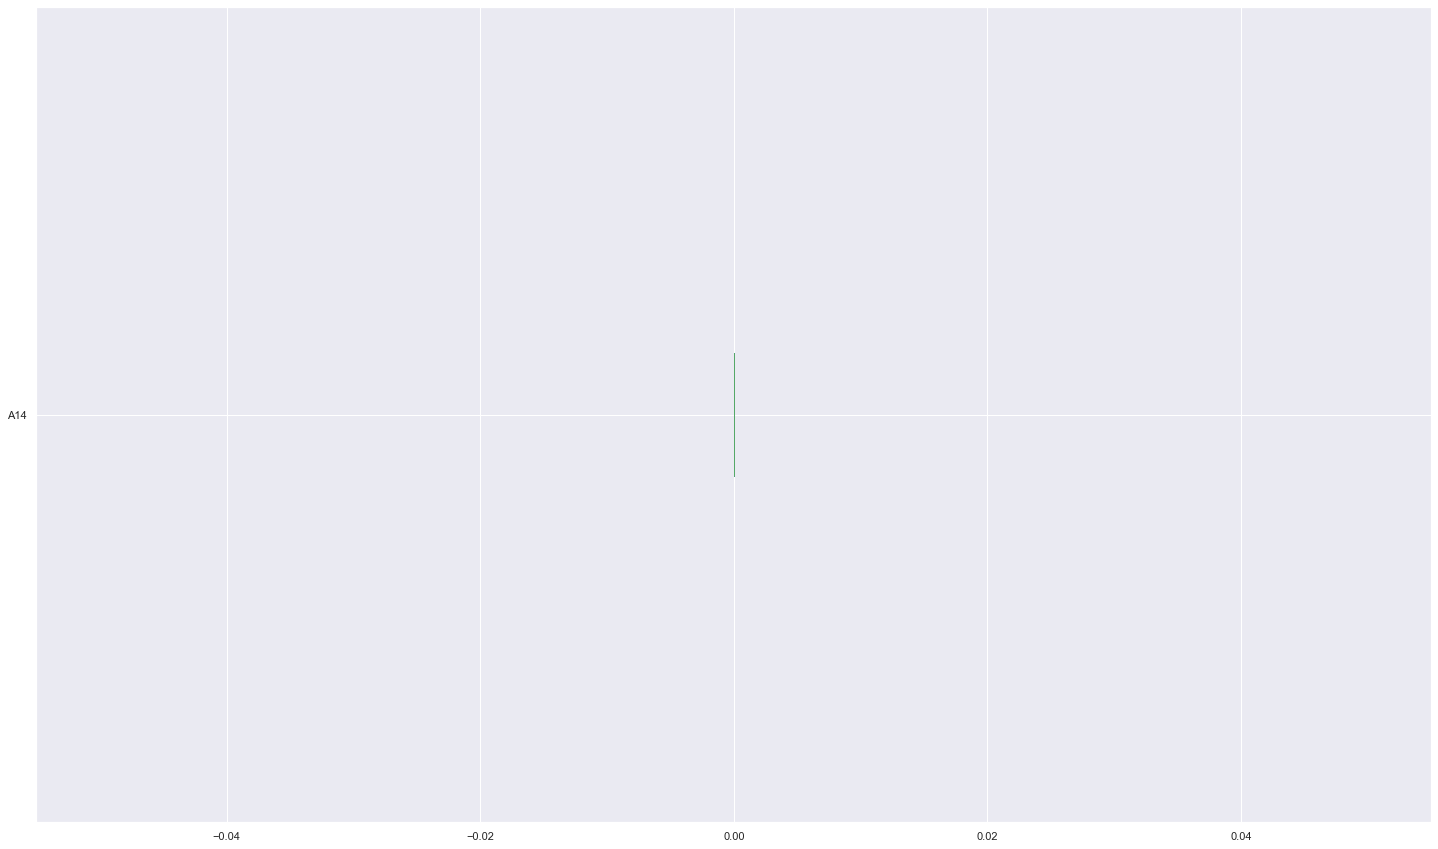

In [63]:
percentile25 = heart_df_test['A14'].quantile(0.25)
percentile75 = heart_df_test['A14'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
heart_df_test[heart_df_test['A14'] > upper_limit]
heart_df_test[heart_df_test['A14'] > upper_limit].count()


heart_df_test['A14'] = np.where(
    heart_df_test['A14'] > upper_limit,
    upper_limit,
    np.where(
        heart_df_test['A14'] < lower_limit,
        lower_limit,
        heart_df_test['A14']
    )
)
heart_df_test['A14'].plot(kind='box',vert=False)

<AxesSubplot:>

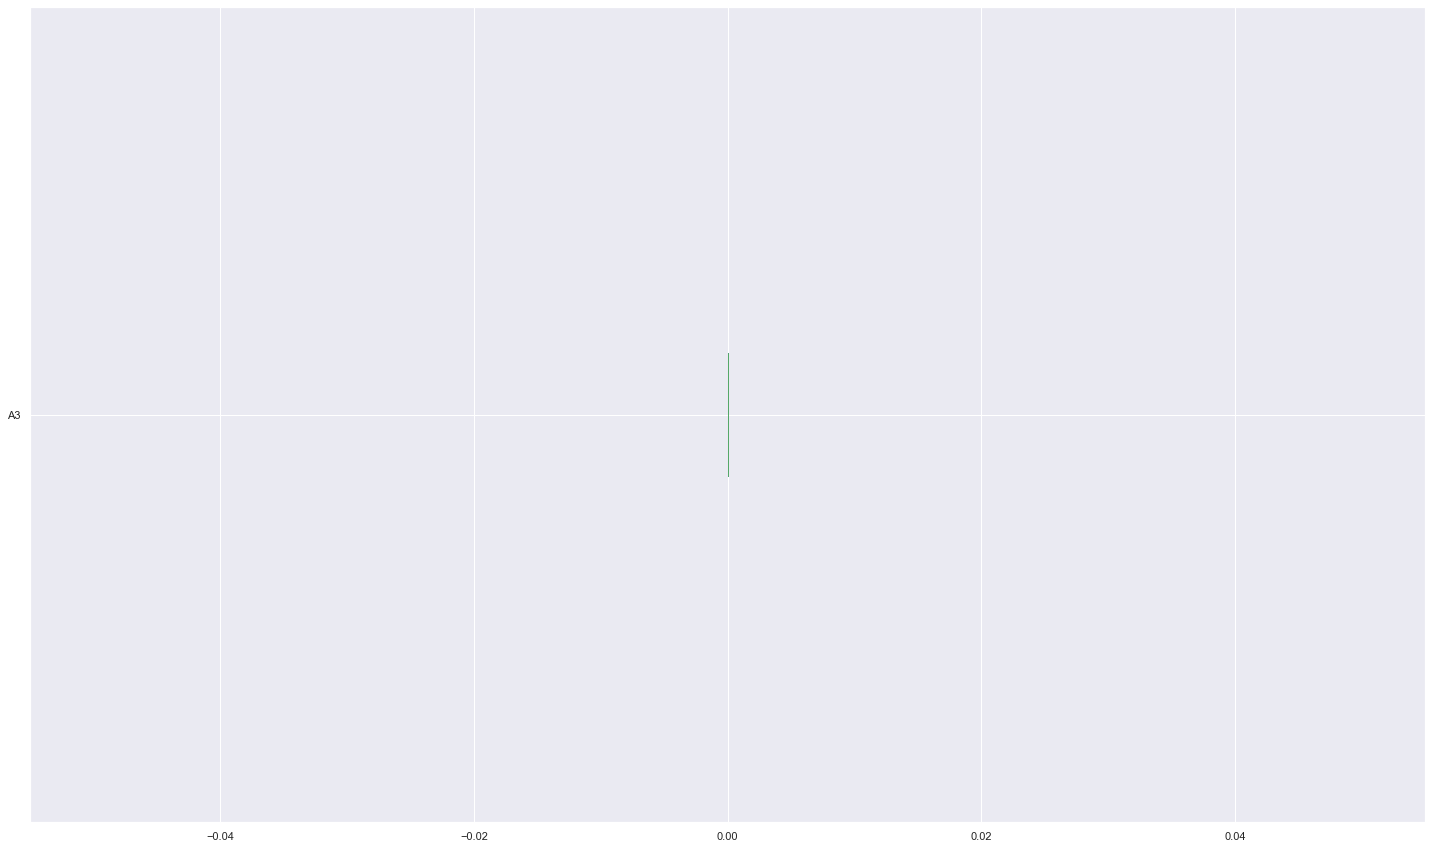

In [64]:
percentile25 = heart_df_test['A3'].quantile(0.25)
percentile75 = heart_df_test['A3'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
heart_df_test[heart_df_test['A3'] > upper_limit]
heart_df_test[heart_df_test['A3'] > upper_limit].count()


heart_df_test['A3'] = np.where(
    heart_df_test['A3'] > upper_limit,
    upper_limit,
    np.where(
        heart_df_test['A3'] < lower_limit,
        lower_limit,
        heart_df_test['A3']
    )
)
heart_df_test['A3'].plot(kind='box',vert=False)

<AxesSubplot:>

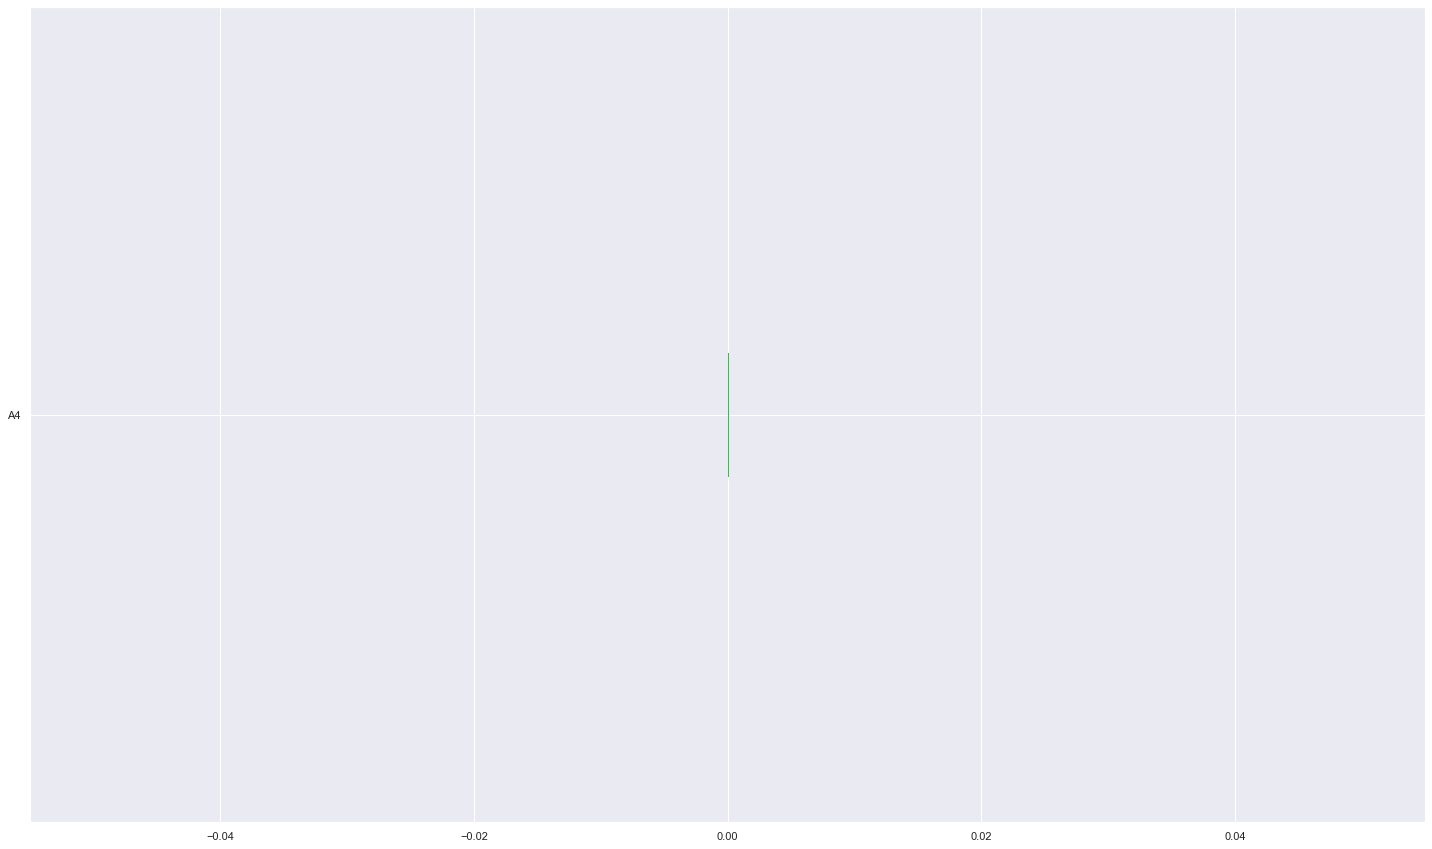

In [65]:
percentile25 = heart_df_test['A4'].quantile(0.25)
percentile75 = heart_df_test['A4'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
heart_df_test[heart_df_test['A4'] > upper_limit]
heart_df_test[heart_df_test['A4'] > upper_limit].count()


heart_df_test['A4'] = np.where(
    heart_df_test['A4'] > upper_limit,
    upper_limit,
    np.where(
        heart_df_test['A4'] < lower_limit,
        lower_limit,
        heart_df_test['A4']
    )
)
heart_df_test['A4'].plot(kind='box',vert=False)

<AxesSubplot:>

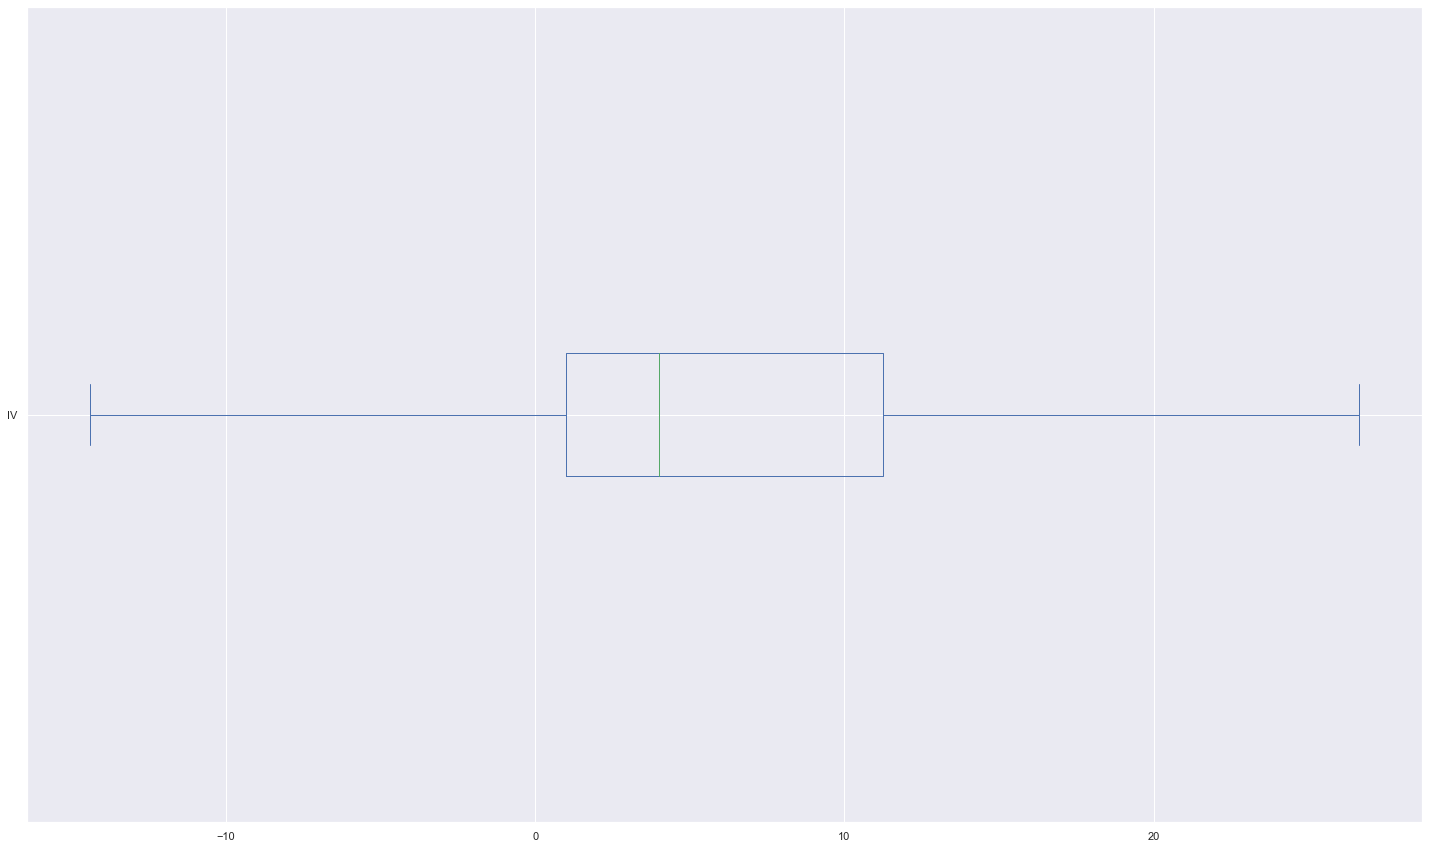

In [66]:
percentile25 = heart_df_test['IV'].quantile(0.25)
percentile75 = heart_df_test['IV'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
heart_df_test[heart_df_test['IV'] > upper_limit]
heart_df_test[heart_df_test['IV'] > upper_limit].count()


heart_df_test['IV'] = np.where(
    heart_df_test['IV'] > upper_limit,
    upper_limit,
    np.where(
        heart_df_test['IV'] < lower_limit,
        lower_limit,
        heart_df_test['IV']
    )
)
heart_df_test['IV'].plot(kind='box',vert=False)

<AxesSubplot:xlabel='variable', ylabel='value'>

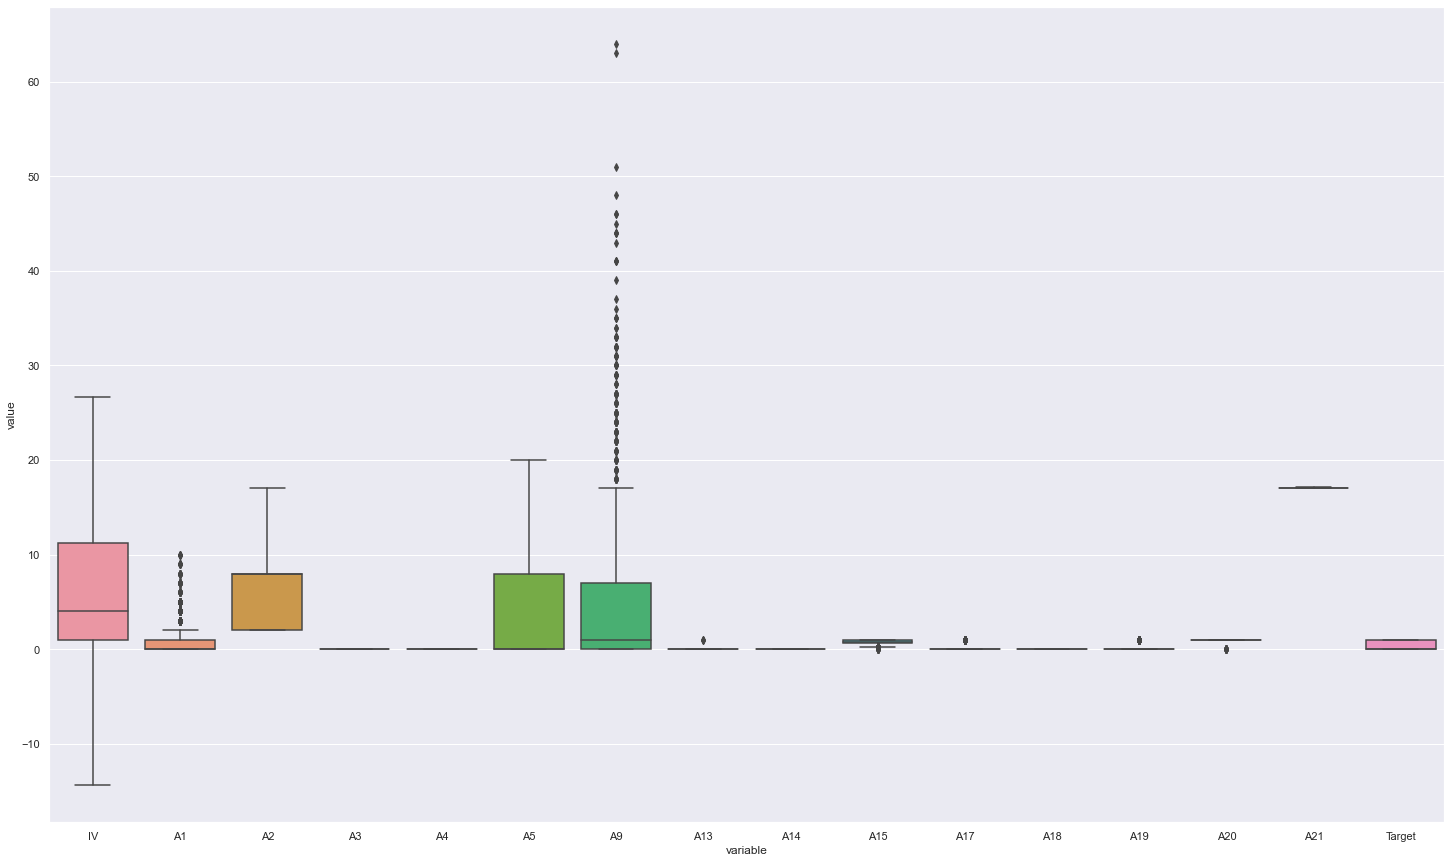

In [67]:
sn.boxplot(x="variable", y="value", data=pd.melt(heart_df_test))

<AxesSubplot:>

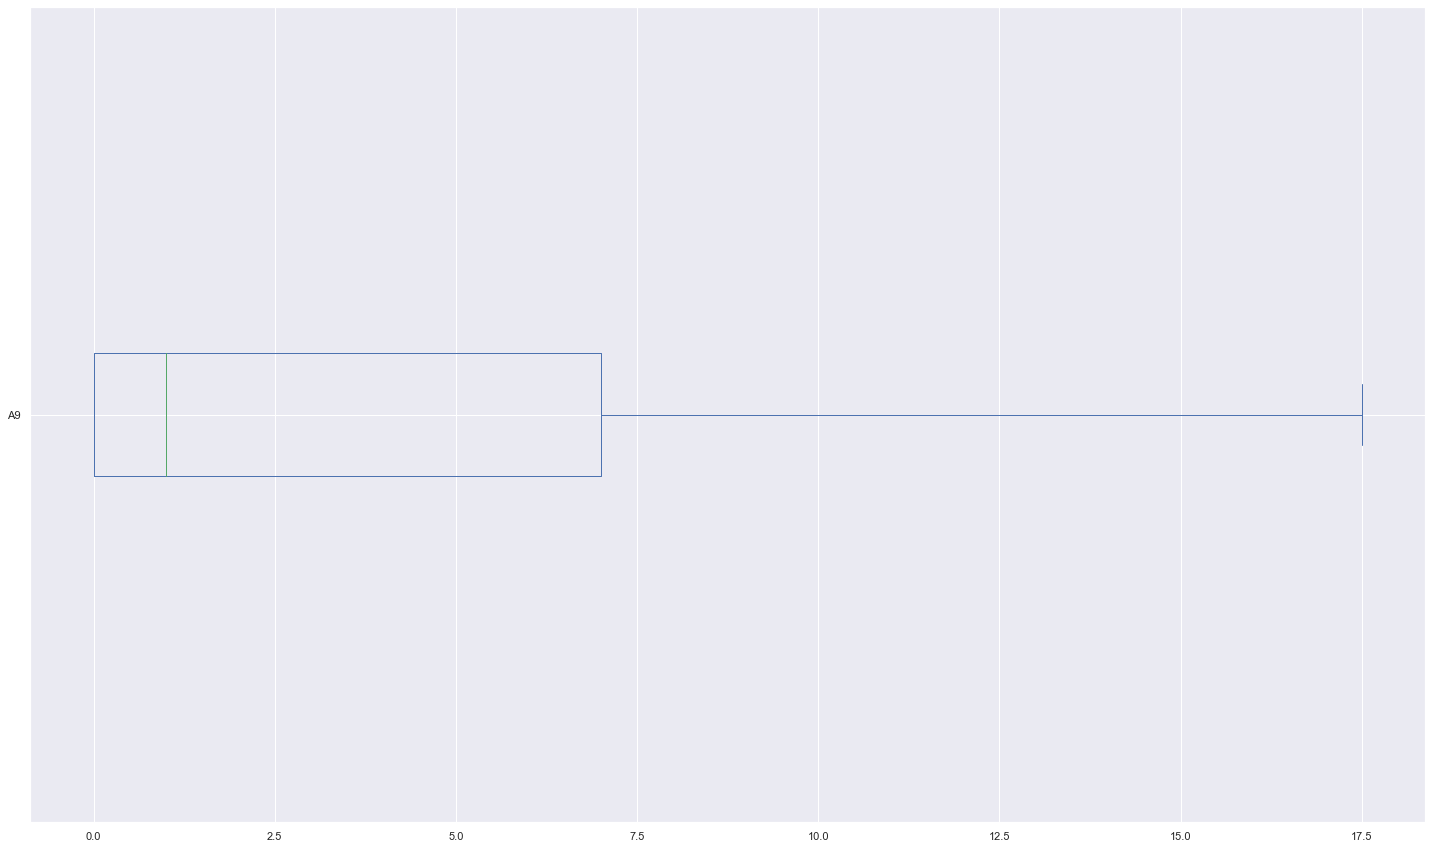

In [68]:
percentile25 = heart_df_test['A9'].quantile(0.25)
percentile75 = heart_df_test['A9'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
heart_df_test[heart_df_test['A9'] > upper_limit]
heart_df_test[heart_df_test['A9'] > upper_limit].count()


heart_df_test['A9'] = np.where(
    heart_df_test['A9'] > upper_limit,
    upper_limit,
    np.where(
        heart_df_test['A9'] < lower_limit,
        lower_limit,
        heart_df_test['A9']
    )
)
heart_df_test['A9'].plot(kind='box',vert=False)

<AxesSubplot:>

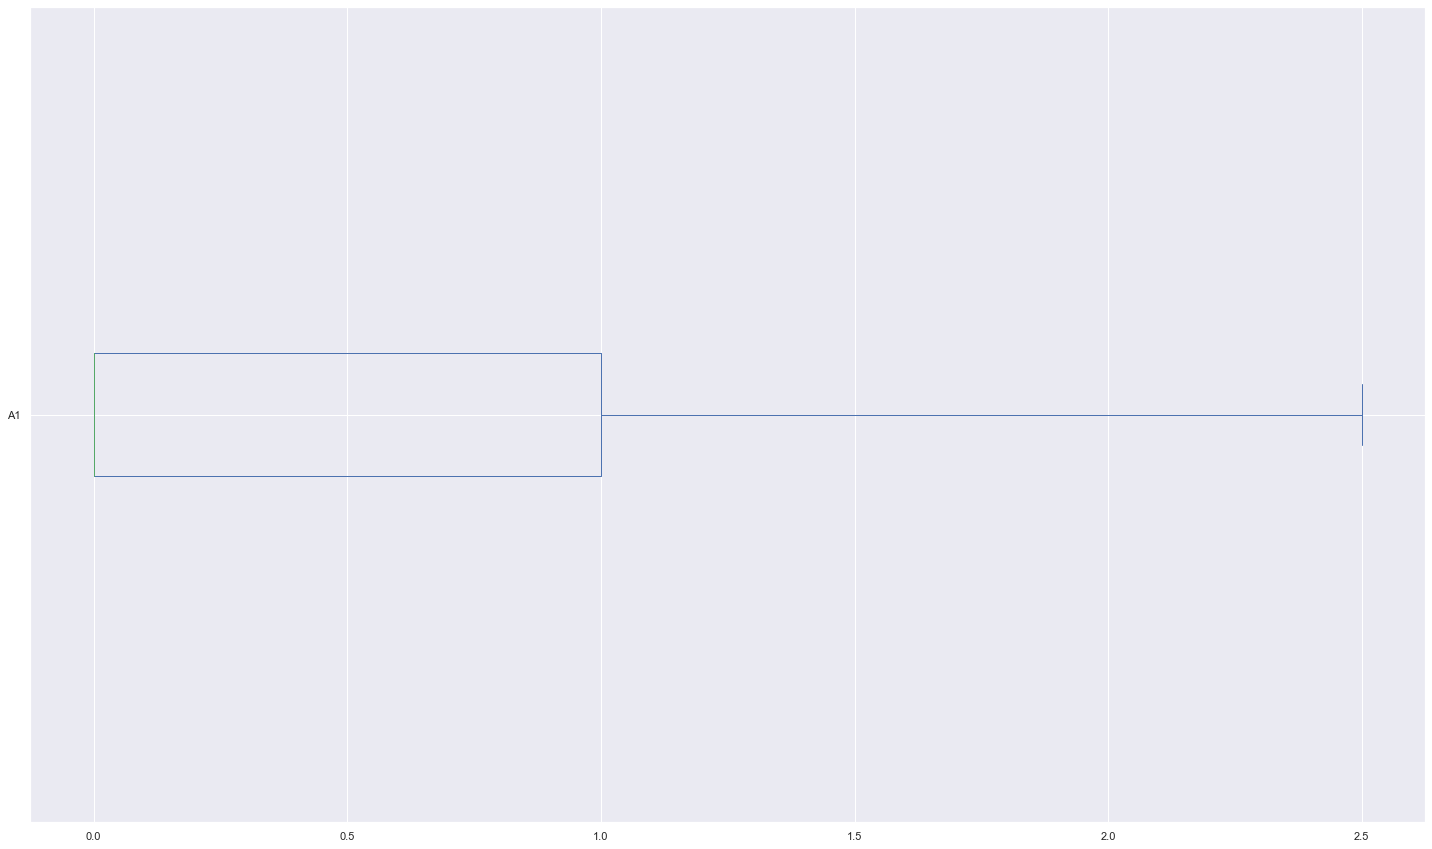

In [69]:
percentile25 = heart_df_test['A1'].quantile(0.25)
percentile75 = heart_df_test['A1'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
heart_df_test[heart_df_test['A1'] > upper_limit]
heart_df_test[heart_df_test['A1'] > upper_limit].count()


heart_df_test['A1'] = np.where(
    heart_df_test['A1'] > upper_limit,
    upper_limit,
    np.where(
        heart_df_test['A1'] < lower_limit,
        lower_limit,
        heart_df_test['A1']
    )
)
heart_df_test['A1'].plot(kind='box',vert=False)

<AxesSubplot:xlabel='variable', ylabel='value'>

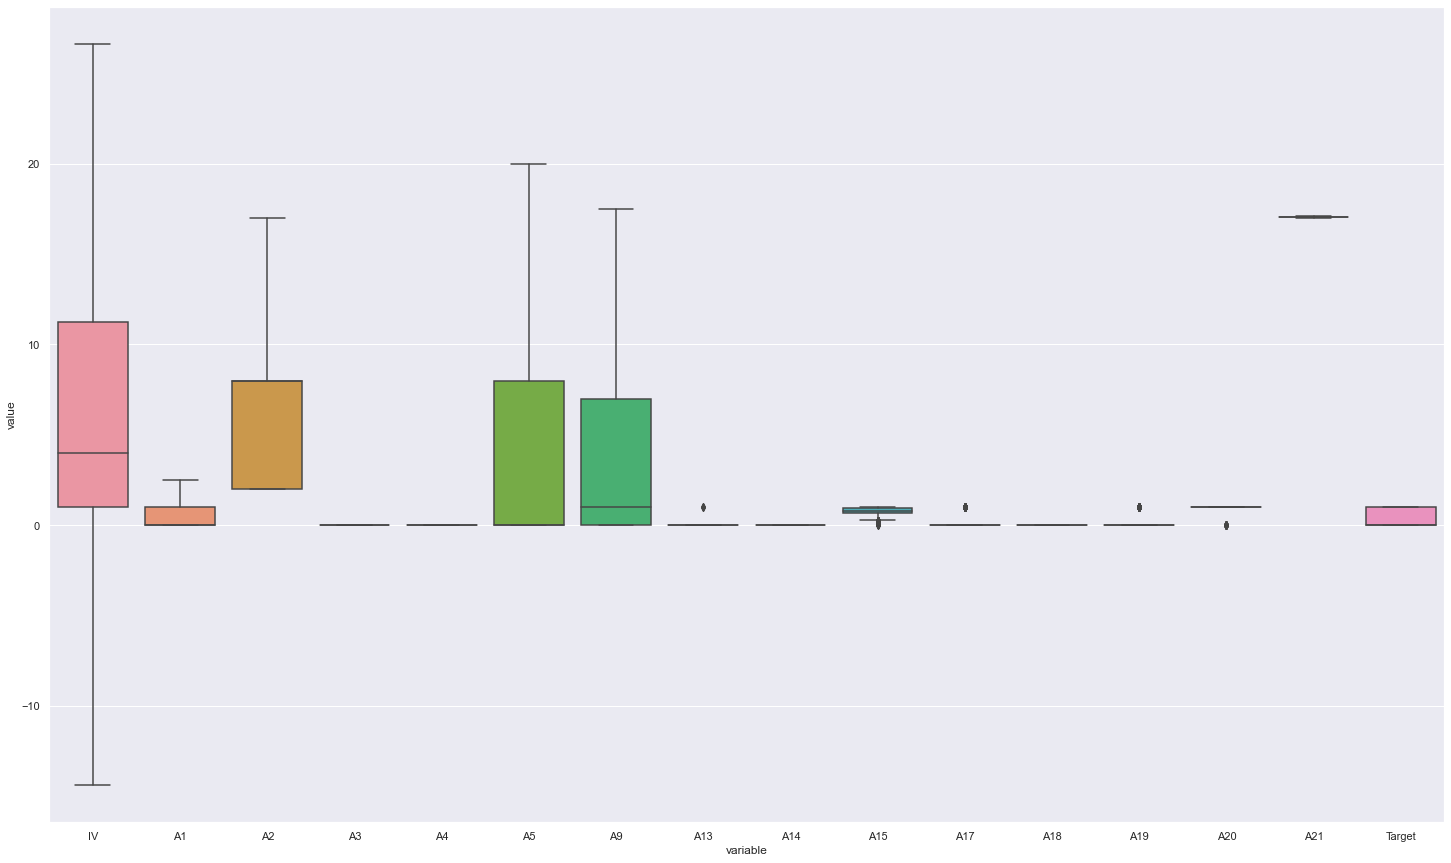

In [70]:
sn.boxplot(x="variable", y="value", data=pd.melt(heart_df_test))

All the outliers are imputed by using cap method

In [71]:
heart_df.shape

(31209, 17)

In [72]:
heart_df= heart_df.drop(['A22'], axis = 1)

In [73]:
heart_df.shape

(31209, 16)

In [74]:
heart_df_test.shape

(2028, 16)

# Predict variable (desired target):

if the person might have a coronary heart disease in the next ten years or not. (binary: “1” means “Yes”, “0” means “No”)

In [75]:
heart_df.Target.value_counts()

0    20293
1    10916
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

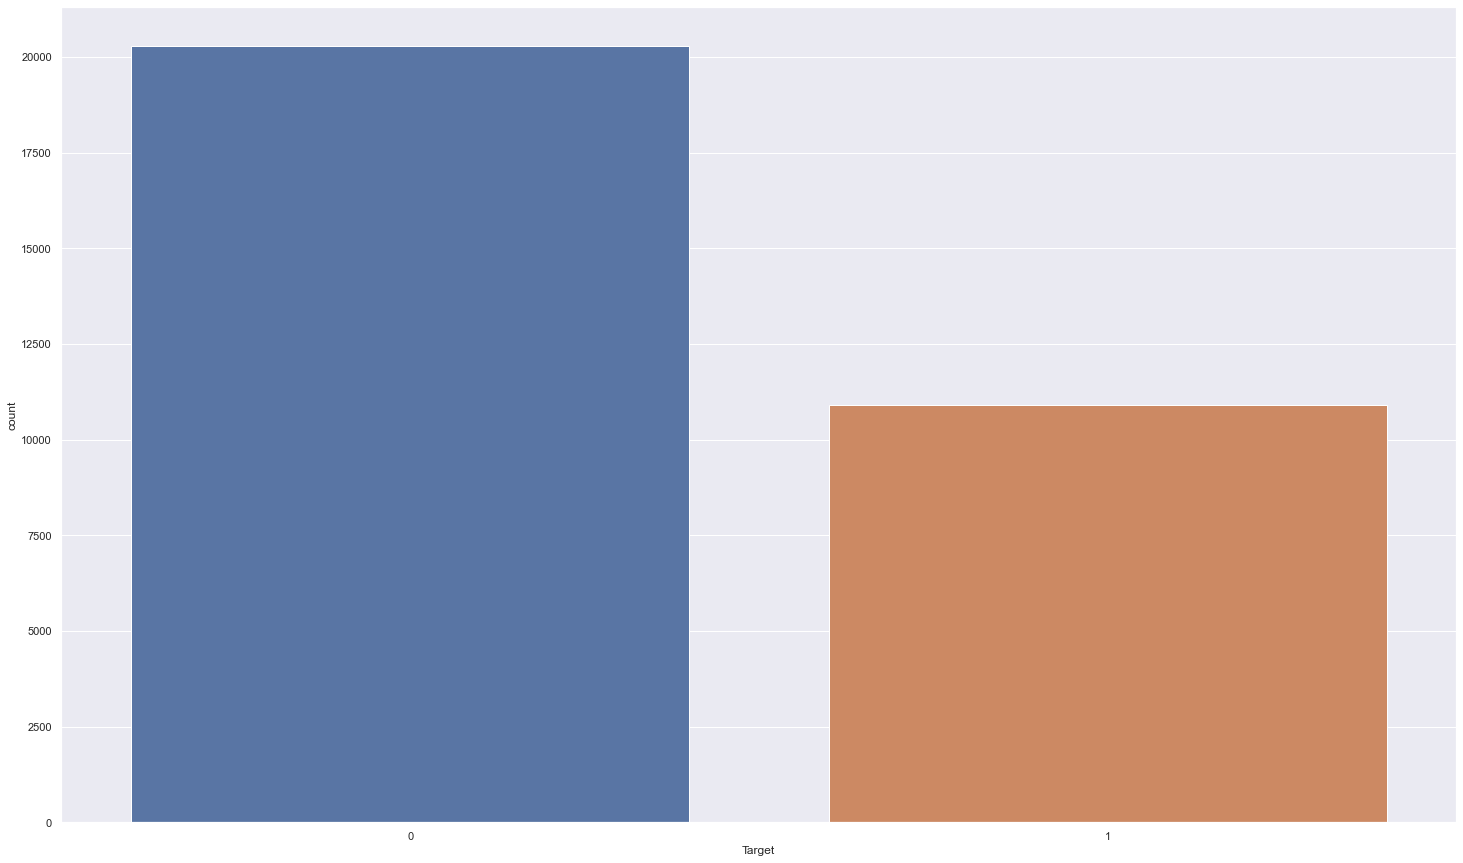

In [76]:
sn.countplot(x='Target',data=heart_df)

There are 20293 patients with no heart disease and 10916 patients with risk of heart disease.

In [77]:
heart_df.describe()

,IV,A1,A2,A3,A4,A5,A9,A13,A14,A15,A17,A18,A19,A20,A21,Target
count,31209.000000,31209.000000,31209.000000,31209.000000,31209.000000,31209.000000,31209.000000,31209.000000,31209.000000,31209.000000,31209.000000,31209.000000,31209.000000,31209.000000,31209.000000,31209.000000
mean,10.565478,0.563075,6.834343,0.723221,0.144157,4.342081,4.920568,0.000929,0.259797,0.776101,0.214009,0.000160,0.121632,0.988241,17.049693,0.349771
std,16.573704,0.860319,3.539744,9.728869,5.648506,6.386017,8.065322,0.030469,6.797874,0.219973,0.410140,0.012657,0.326865,0.107803,0.028802,0.476905
min,-21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.680000,0.000000,0.000000,0.000000,1.000000,17.024638,0.000000
50%,4.000000,0.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,1.000000,17.049534,0.000000
75%,12.000000,1.000000,8.000000,0.000000,0.000000,7.000000,7.000000,0.000000,0.000000,0.960000,0.000000,0.000000,0.000000,1.000000,17.074577,1.000000
max,265.000000,2.500000,17.000000,1050.000000,508.000000,17.500000,187.000000,1.000000,638.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000


In [78]:
heart_df_test.Target.value_counts()

0    1286
1     742
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

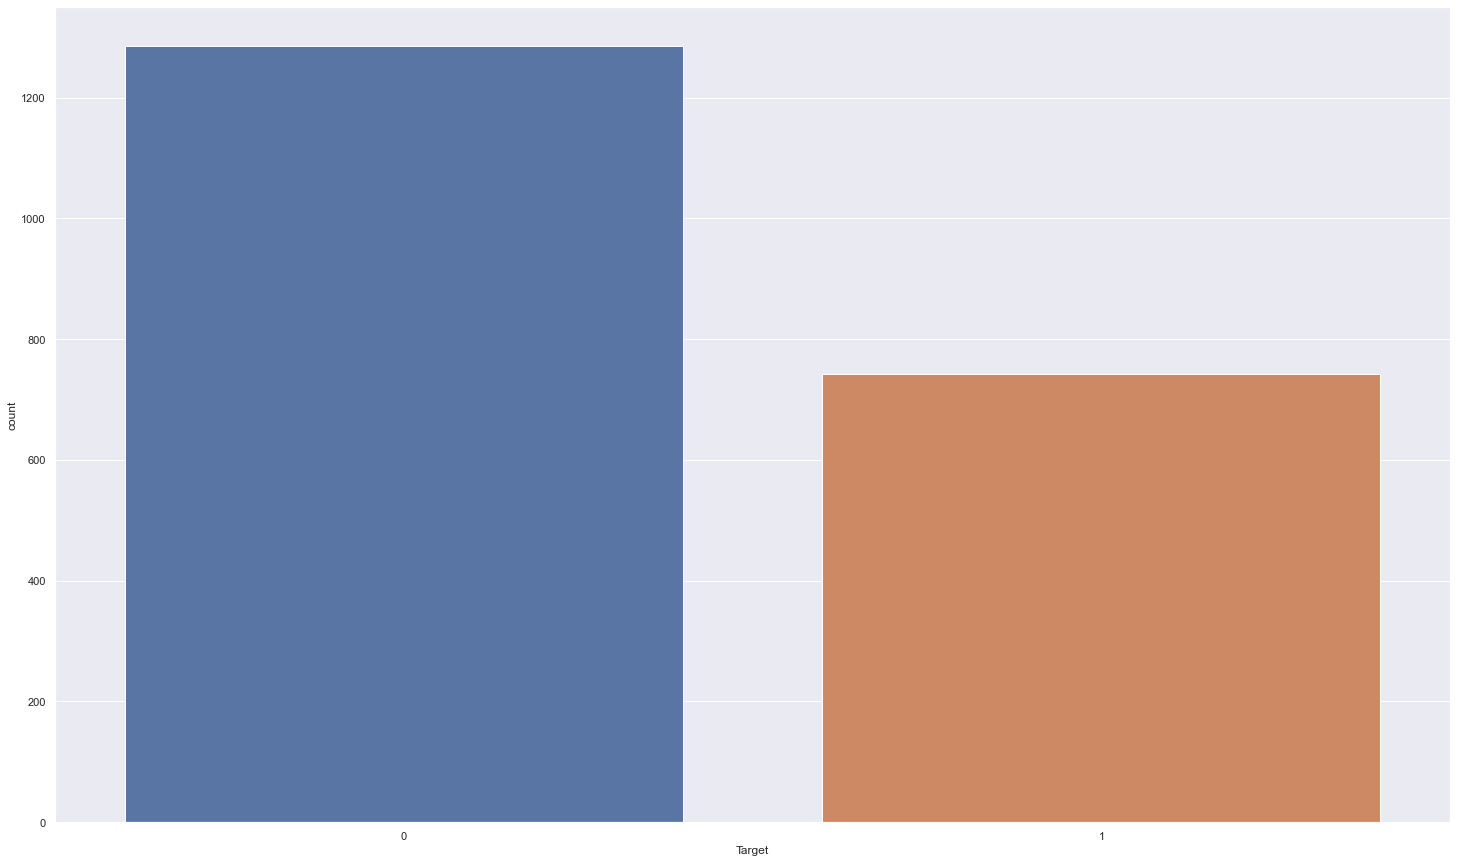

In [79]:
sn.countplot(x='Target',data=heart_df_test)

In [80]:
heart_df_test.describe()

,IV,A1,A2,A3,A4,A5,A9,A13,A14,A15,A17,A18,A19,A20,A21,Target
count,2028.000000,2028.000000,2028.000000,2028.0,2028.0,2028.000000,2028.000000,2028.000000,2028.0,2028.000000,2028.000000,2028.0,2028.000000,2028.000000,2028.000000,2028.000000
mean,7.655202,0.551282,6.814596,0.0,0.0,4.717456,4.136834,0.001479,0.0,0.762249,0.215976,0.0,0.116371,0.992110,17.050072,0.365878
std,8.605282,0.855542,3.509680,0.0,0.0,6.999299,5.764314,0.038443,0.0,0.225425,0.411599,0.0,0.320748,0.088494,0.028446,0.481794
min,-14.375000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.020000,0.000000,0.0,0.000000,0.000000,17.000009,0.000000
25%,1.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.680000,0.000000,0.0,0.000000,1.000000,17.026082,0.000000
50%,4.000000,0.000000,8.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.810000,0.000000,0.0,0.000000,1.000000,17.050570,0.000000
75%,11.250000,1.000000,8.000000,0.0,0.0,8.000000,7.000000,0.000000,0.0,0.960000,0.000000,0.0,0.000000,1.000000,17.074222,1.000000
max,26.625000,2.500000,17.000000,0.0,0.0,20.000000,17.500000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,17.099891,1.000000


## <font color=RoyalBlue>Logistic Regression<font>
    
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [81]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

,const,IV,A1,A2,A3,A4,A5,A9,A13,A14,A15,A17,A18,A19,A20,A21,Target
0,1.0,10,2.5,8.0,0,0,3.0,13,0,0,0.98,0,0,0,1,17.078496,0
1,1.0,8,0.0,12.0,0,0,0.0,0,0,0,0.74,0,0,0,1,17.051237,0
2,1.0,87,2.0,17.0,0,0,0.0,8,0,0,0.26,0,0,0,1,17.088096,0
3,1.0,14,0.0,2.0,0,0,0.0,5,0,0,0.99,1,0,0,1,17.055810,0
4,1.0,20,2.0,8.0,0,0,0.0,2,0,0,0.28,0,0,0,1,17.026387,0


In [82]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.Target,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.412624
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                31209
Model:                          Logit   Df Residuals:                    31193
Method:                           MLE   Df Model:                           15
Date:                Wed, 30 Mar 2022   Pseudo R-squ.:                  0.3626
Time:                        15:11:50   Log-Likelihood:                -12878.
converged:                       True   LL-Null:                       -20202.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.1541      9.100     -1.446      0.148     -30.990       4.681
IV            -0.1907      0.004    -52.486      0.000      -0.198      -0.184
A1             0.0547      0.020      2.731      0.006       0.015       0.094
A2            -0.1033      0.005    -22.171      0.000      -0.112      -0.094
A3            -0.0344      0.005     -6.349      0.000      -0.045      -0.024
A4             0.0440      0.038      1.145      0.252      -0.031       0.119
A5             0.0928      0.003     29.083      0.000       0.087       0.099
A9             0.1159      0.004     32.428      0.000       0.109       0.123
A13           -0.0039      0.486     -0.008      0.994      -0.956       0.949
A14            0.0317      0.010      3.067      0.002       0.011       0.052
A15           -0.4073      0.072     -5.695      0.000      -0.547      -0.267
A17           -0.3701      0.042     -8.845      0.000      -0.452      -0.288
A18           -2.7784      1.055     -2.634      0.008      -4.846      -0.711
A19            0.0570      0.046      1.237      0.216      -0.033       0.147
A20           -0.2239      0.137     -1.635      0.102      -0.492       0.045
A21            0.8160      0.534      1.529      0.126      -0.230       1.862
==============================================================================
"""

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elemination approach is used here to remove those attributes with highest Pvalue one at a time follwed by running the regression repeatedly until all attributes have P Values less than 0.05.

# Feature Selection: Backward elemination (P-value approach)

In [83]:
remove_list = ['const', 'A4', 'A13', 'A19', 'A20', 'A21']
heart_df1 = heart_df_constant.drop(['A4', 'A13', 'A19', 'A20', 'A21'],axis =1)

res = [i for i in cols if i not in remove_list]
X=heart_df1[res]
y=heart_df1['Target']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.413851
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                31209
Model:                          Logit   Df Residuals:                    31199
Method:                           MLE   Df Model:                            9
Date:                Wed, 30 Mar 2022   Pseudo R-squ.:                  0.3607
Time:                        15:11:50   Log-Likelihood:                -12916.
converged:                       True   LL-Null:                       -20202.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IV            -0.1877      0.004    -52.662      0.000      -0.195      -0.181
A1             0.0617      0.

# SPLITTING THE TRAIN AND TEST DATA SETS INTO x_train, x_test , y_train,y_test

In [84]:
import sklearn
new_features=heart_df[['IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A9', 'A13', 'A14', 'A17', 'A18', 'A15', 'A19', 'A20', 'A21', 'Target']]
x_train=new_features.iloc[:,:-1]
y_train=new_features.iloc[:,-1]

In [85]:
x_train

,IV,A1,A2,A3,A4,A5,A9,A13,A14,A17,A18,A15,A19,A20,A21
0,10,2.5,8.0,0,0,3.0,13,0,0,0,0,0.98,0,1,17.078496
1,8,0.0,12.0,0,0,0.0,0,0,0,0,0,0.74,0,1,17.051237
2,87,2.0,17.0,0,0,0.0,8,0,0,0,0,0.26,0,1,17.088096
3,14,0.0,2.0,0,0,0.0,5,0,0,1,0,0.99,0,1,17.055810
4,20,2.0,8.0,0,0,0.0,2,0,0,0,0,0.28,0,1,17.026387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34287,2,2.5,2.0,0,0,13.0,7,0,0,0,0,0.05,1,1,17.013023
34288,0,0.0,12.0,0,0,4.0,0,0,0,0,0,0.62,0,1,17.081446
34289,0,0.0,8.0,0,0,7.0,5,0,0,0,0,1.00,0,1,17.051265
34290,88,2.0,4.0,0,0,0.0,18,0,0,1,0,0.22,0,1,17.004158


In [86]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
34287    1
34288    1
34289    1
34290    1
34291    1
Name: Target, Length: 31209, dtype: int64

In [87]:
import sklearn
new_features=heart_df_test[['IV',
'A1',
'A2',
'A3',
'A4',
'A5',
'A9',
'A13',
'A14',
'A15',
'A17',
'A18',
'A19',
'A20',
'A21',
'Target' ]]
x_test=new_features.iloc[:,:-1]
y_test=new_features.iloc[:,-1]


In [88]:
x_test

,IV,A1,A2,A3,A4,A5,A9,A13,A14,A15,A17,A18,A19,A20,A21
0,2.000,0.0,8.0,0.0,0.0,0.0,0.0,0,0.0,0.17,0,0,0,1,17.085153
1,13.000,1.0,12.0,0.0,0.0,0.0,0.0,0,0.0,0.48,1,0,0,1,17.035763
2,19.000,0.0,8.0,0.0,0.0,0.0,0.0,0,0.0,0.77,0,0,0,1,17.001176
5,9.000,2.0,8.0,0.0,0.0,0.0,6.0,0,0.0,0.87,0,0,0,1,17.092655
6,26.625,2.5,8.0,0.0,0.0,0.0,7.0,0,0.0,0.94,0,0,0,1,17.040504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,0.000,1.0,8.0,0.0,0.0,9.0,4.0,0,0.0,0.08,0,0,0,1,17.014092
2234,1.000,2.0,4.0,0.0,0.0,6.0,5.0,0,0.0,0.78,0,0,0,1,17.094999
2235,1.000,0.0,8.0,0.0,0.0,4.0,2.0,0,0.0,0.07,0,0,1,1,17.099327
2237,1.000,0.0,10.0,0.0,0.0,9.0,7.0,0,0.0,0.89,0,0,0,1,17.050805


In [89]:
y_test

0       0
1       0
2       0
5       0
6       0
       ..
2233    1
2234    1
2235    1
2237    1
2238    1
Name: Target, Length: 2028, dtype: int64

In [90]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [91]:
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [92]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## <font color=RoyalBlue>Model Evaluation<font>

### <font color=CornflowerBlue>Model accuracy<font>

In [93]:
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8254437869822485


####  <font color=DarkBlue>Accuracy of the model is 0.83<font>

the accuracy of the model which i was developed using logistic regression is near to 1. it was pretty good.

# Confusion matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

<AxesSubplot:>

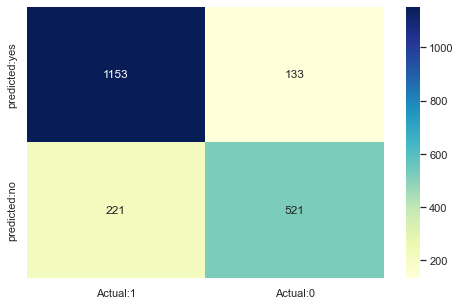

In [94]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Actual:1','Actual:0'],index=['predicted:yes','predicted:no'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [95]:
cm=confusion_matrix(y_test,y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1153  133]
 [ 221  521]]


The confusion matrix shows 1153 + 521 = 1674  correct predictions and 221+133= 354 incorrect ones.

**<font color=DarkBlue>True Positives:**  1153<font>

**<font color=DarkBlue>True Negatives:**  521<font>

**<font color=DarkBlue>False Positives:** 133(*Type I error*)<font>

**<font color=DarkBlue>False Negatives:**  221( *Type II error*)<font>

# Metrics Calculations

In [96]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
recall = sensitivity
specificity=TN/float(TN+FP)
accuracy = (TP+TN)/float(TP+TN+FP+FN)
precision = TP/float(TP+FP)

In [97]:
sensitivity

0.7021563342318059

In [98]:
specificity

0.8965785381026439

### <font color=CornflowerBlue>Model Evaluation - Statistics<font>

In [99]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',
      
'Precision = TP/(TP+FP) = ', TP/float(TP+FP), '\n',
      
'F1 ratio = 2/(1/Precision + 1/Recall)', 2/((1/precision)+(1/recall)) , '\n'

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8254437869822485 
 The Missclassification = 1-Accuracy =  0.17455621301775148 
 Sensitivity or Recall or True Positive Rate = TP/(TP+FN) =  0.7021563342318059 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8965785381026439 
 Precision = TP/(TP+FP) =  0.7966360856269113 
 F1 ratio = 2/(1/Precision + 1/Recall) 0.7464183381088826 
Positive Predictive value = TP/(TP+FP) =  0.7966360856269113 
 Negative predictive Value = TN/(TN+FN) =  0.839155749636099 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  6.789271021218816 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.3322003071794428


### <font color=CornflowerBlue>Predicted probabilities of  0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes)  for the test data with a default classification threshold of 0.5<font>

In [100]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head(10)

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.674838,0.325162
1,0.965870,0.034130
2,0.985223,0.014777
3,0.820689,0.179311
4,0.991583,0.008417
5,0.725721,0.274279
6,0.851521,0.148479
7,0.926126,0.073874
8,0.017668,0.982332
9,0.956285,0.043715


In [101]:
print('Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  6.789271021218816 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.3322003071794428


### <font color=CornflowerBlue>ROC curve<font>

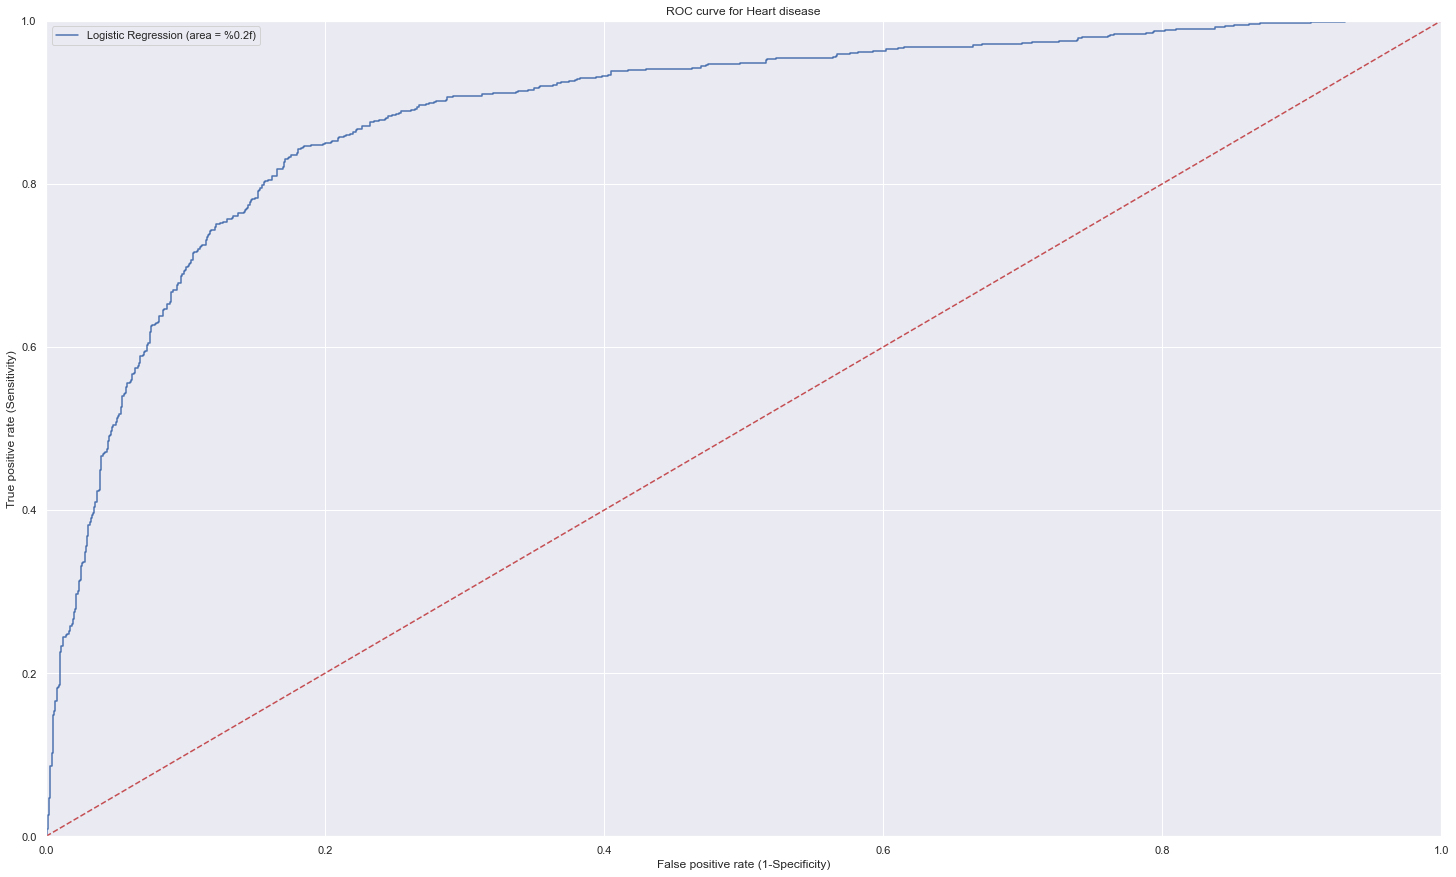

In [102]:
from sklearn.metrics import roc_curve
y_pred_prob_yes=logreg.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.legend()
plt.show()

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (# true positives/ total # positives) versus the false positive rate (# false positives / total # negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

### <font color=CornflowerBlue>Area Under The Curve (AUC)<font>

The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that  as possible. An area of 1 is ideal. The closer the AUC to 1 the better.

In [103]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.8887385612421559

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1286
           1       0.80      0.70      0.75       742

    accuracy                           0.83      2028
   macro avg       0.82      0.80      0.81      2028
weighted avg       0.82      0.83      0.82      2028



# CONCLUSION

 - **<font color=darkblue>The model predicted with 0.83 accuracy. </font>**


 - **<font color=darkblue>The Area under the ROC curve is 88.8 which is extremely satisfactory.</font> **
 

 - ** <font color=darkblue>Overall model could be improved with more data.</font>**

 ** <font color=darkblue>The model is highly specific with Specificity or True Negative Rate =0.8965785381026439  </font>**
 
 ** <font color=darkblue>The model is highly precise with  Precision =  0.7966360856269113   </font>**
 
 ** <font color=darkblue>The model is sensible  with Sensitivity or Recall or True Positive Rate =   0.7021563342318059 </font>
 
 **<font color=darkblue> f1-score = 0.7464183381088826    </font>**
 
  **<font color=darkblue> The Missclassification=  0.17455621301775148    </font>**
</div>